## Smoke drink predictor

- Sex	male, female	
- age	round up to 5 years	
- height	round up to 5 cm[cm]
- weight	[kg]	
- sight_left	eyesight(left)	
- sight_right	eyesight(right)	
- hear_left	hearing left, 1(normal), 2(abnormal
- hear_right	hearing right, 1(normal), 2(abnormal)
- SBP	Systolic blood pressure[mmHg]
- DBP	Diastolic blood pressure[mmHg]
- BLDS	BLDS or FSG(fasting blood glucose)[mg/dL]
- tot_chole	total cholesterol[mg/dL]
- HDL_chole	HDL cholesterol[mg/dL]	HDL 
- LDL_chole	LDL cholesterol[mg/dL]	LDL 
- triglyceride	triglyceride[mg/dL]
- hemoglobin	hemoglobin[g/dL
- urine_protein	protein in urine, 1(-), 2(+/-), 3(+1), 4(+2), 5(+3), 6(+4
- serum_creatinine	serum(blood) creatinine[mg/dL]	
- SGOT_AST	SGOT(Glutamate-oxaloacetate transaminase) AST(Aspartate transaminase)[IU/L]	
- SGOT_ALT	ALT(Alanine transaminase)[IU/L]	
- gamma_GTP	y-glutamyl transpeptidase[IU/L]	]
- SMK_stat_type_cd	Smoking state, 1(never), 2(used to smoke but quit), 3(still smoke
- DRK_YN	Drinker or Not	

### IMPORTING PACKAGES

In [4]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### DATA OVERVIEWS

In [5]:
data = pd.read_csv("../data/smoking_driking.csv")

In [6]:
data.head(2)

sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0  Male   35     170      75       90.0         1.0          1.0        1.0   
1  Male   30     180      80       89.0         0.9          1.2        1.0   

   hear_right    SBP  ...  LDL_chole  triglyceride  hemoglobin  urine_protein  \
0         1.0  120.0  ...      126.0          92.0        17.1            1.0   
1         1.0  130.0  ...      148.0         121.0        15.8            1.0   

   serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  
0               1.0      21.0      35.0       40.0               1.0       Y  
1               0.9      20.0      36.0       27.0               3.0       N  

[2 rows x 24 columns]

In [7]:
data.shape

(991346, 24)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [9]:
data.describe()

age         height         weight      waistline  \
count  991346.000000  991346.000000  991346.000000  991346.000000   
mean       47.614491     162.240625      63.284050      81.233358   
std        14.181339       9.282957      12.514241      11.850323   
min        20.000000     130.000000      25.000000       8.000000   
25%        35.000000     155.000000      55.000000      74.100000   
50%        45.000000     160.000000      60.000000      81.000000   
75%        60.000000     170.000000      70.000000      87.800000   
max        85.000000     190.000000     140.000000     999.000000   

          sight_left    sight_right      hear_left     hear_right  \
count  991346.000000  991346.000000  991346.000000  991346.000000   
mean        0.980834       0.978429       1.031495       1.030476   
std         0.605949       0.604774       0.174650       0.171892   
min         0.100000       0.100000       1.000000       1.000000   
25%         0.700000       0.700000       1.000000       1.000000   
50%         1.000000       1.000000       1.000000       1.000000   
75%         1.200000       1.200000       1.000000       1.000000   
max         9.900000       9.900000       2.000000       2.000000   

                 SBP            DBP  ...      HDL_chole      LDL_chole  \
count  991346.000000  991346.000000  ...  991346.000000  991346.000000   
mean      122.432498      76.052627  ...      56.936800     113.037692   
std        14.543148       9.889365  ...      17.238479      35.842812   
min        67.000000      32.000000  ...       1.000000       1.000000   
25%       112.000000      70.000000  ...      46.000000      89.000000   
50%       120.000000      76.000000  ...      55.000000     111.000000   
75%       131.000000      82.000000  ...      66.000000     135.000000   
max       273.000000     185.000000  ...    8110.000000    5119.000000   

        triglyceride     hemoglobin  urine_protein  serum_creatinine  \
count  991346.000000  991346.000000  991346.000000     991346.000000   
mean      132.141751      14.229824       1.094224          0.860467   
std       102.196985       1.584929       0.437724          0.480530   
min         1.000000       1.000000       1.000000          0.100000   
25%        73.000000      13.200000       1.000000          0.700000   
50%       106.000000      14.300000       1.000000          0.800000   
75%       159.000000      15.400000       1.000000          1.000000   
max      9490.000000      25.000000       6.000000         98.000000   

            SGOT_AST       SGOT_ALT      gamma_GTP  SMK_stat_type_cd  
count  991346.000000  991346.000000  991346.000000     991346.000000  
mean       25.989308      25.755051      37.136347          1.608122  
std        23.493386      26.308599      50.424153          0.818507  
min         1.000000       1.000000       1.000000          1.000000  
25%        19.000000      15.000000      16.000000          1.000000  
50%        23.000000      20.000000      23.000000          1.000000  
75%        28.000000      29.000000      39.000000          2.000000  
max      9999.000000    7210.000000     999.000000          3.000000  

[8 rows x 22 columns]

In [10]:
columns = data.columns
columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')

In [11]:
data.describe(include=['O'])

sex  DRK_YN
count   991346  991346
unique       2       2
top       Male       N
freq    526415  495858

In [12]:
columns_with_missing_values = data.columns[data.isnull().sum() > 0]
print(columns_with_missing_values)

Index([], dtype='object')


In [13]:
sex_mapping = {'Male': 1, 'Female': 0} 
data['sex'] = data['sex'].map(sex_mapping)

drk_mapping = {'Y': 1, 'N': 0} 
data['DRK_YN'] = data['DRK_YN'].map(drk_mapping)

In [14]:

data.head()

sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0    1   35     170      75       90.0         1.0          1.0        1.0   
1    1   30     180      80       89.0         0.9          1.2        1.0   
2    1   40     165      75       91.0         1.2          1.5        1.0   
3    1   50     175      80       91.0         1.5          1.2        1.0   
4    1   50     165      60       80.0         1.0          1.2        1.0   

   hear_right    SBP  ...  LDL_chole  triglyceride  hemoglobin  urine_protein  \
0         1.0  120.0  ...      126.0          92.0        17.1            1.0   
1         1.0  130.0  ...      148.0         121.0        15.8            1.0   
2         1.0  120.0  ...       74.0         104.0        15.8            1.0   
3         1.0  145.0  ...      104.0         106.0        17.6            1.0   
4         1.0  138.0  ...      117.0         104.0        13.8            1.0   

   serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  
0               1.0      21.0      35.0       40.0               1.0       1  
1               0.9      20.0      36.0       27.0               3.0       0  
2               0.9      47.0      32.0       68.0               1.0       0  
3               1.1      29.0      34.0       18.0               1.0       0  
4               0.8      19.0      12.0       25.0               1.0       0  

[5 rows x 24 columns]

In [15]:
is_smoking= data['SMK_stat_type_cd']
print(is_smoking.head())

is_drinking = data['DRK_YN']
print(is_drinking.head())

0    1.0
1    3.0
2    1.0
3    1.0
4    1.0
Name: SMK_stat_type_cd, dtype: float64
0    1
1    0
2    0
3    0
4    0
Name: DRK_YN, dtype: int64


In [16]:
# current_y_is_smoking_or_drinking = 'SMK_stat_type_cd'
current_y_is_smoking_or_drinking = 'DRK_YN'

### Categorical Variable Analysis

Plotting 1...
Plotting 2...
Plotting 3...
Plotting 4...
Plotting 5...
Plotting 6...
Plotting 7...
Plotting 8...
Plotting 9...
Plotting 10...
Plotting 11...


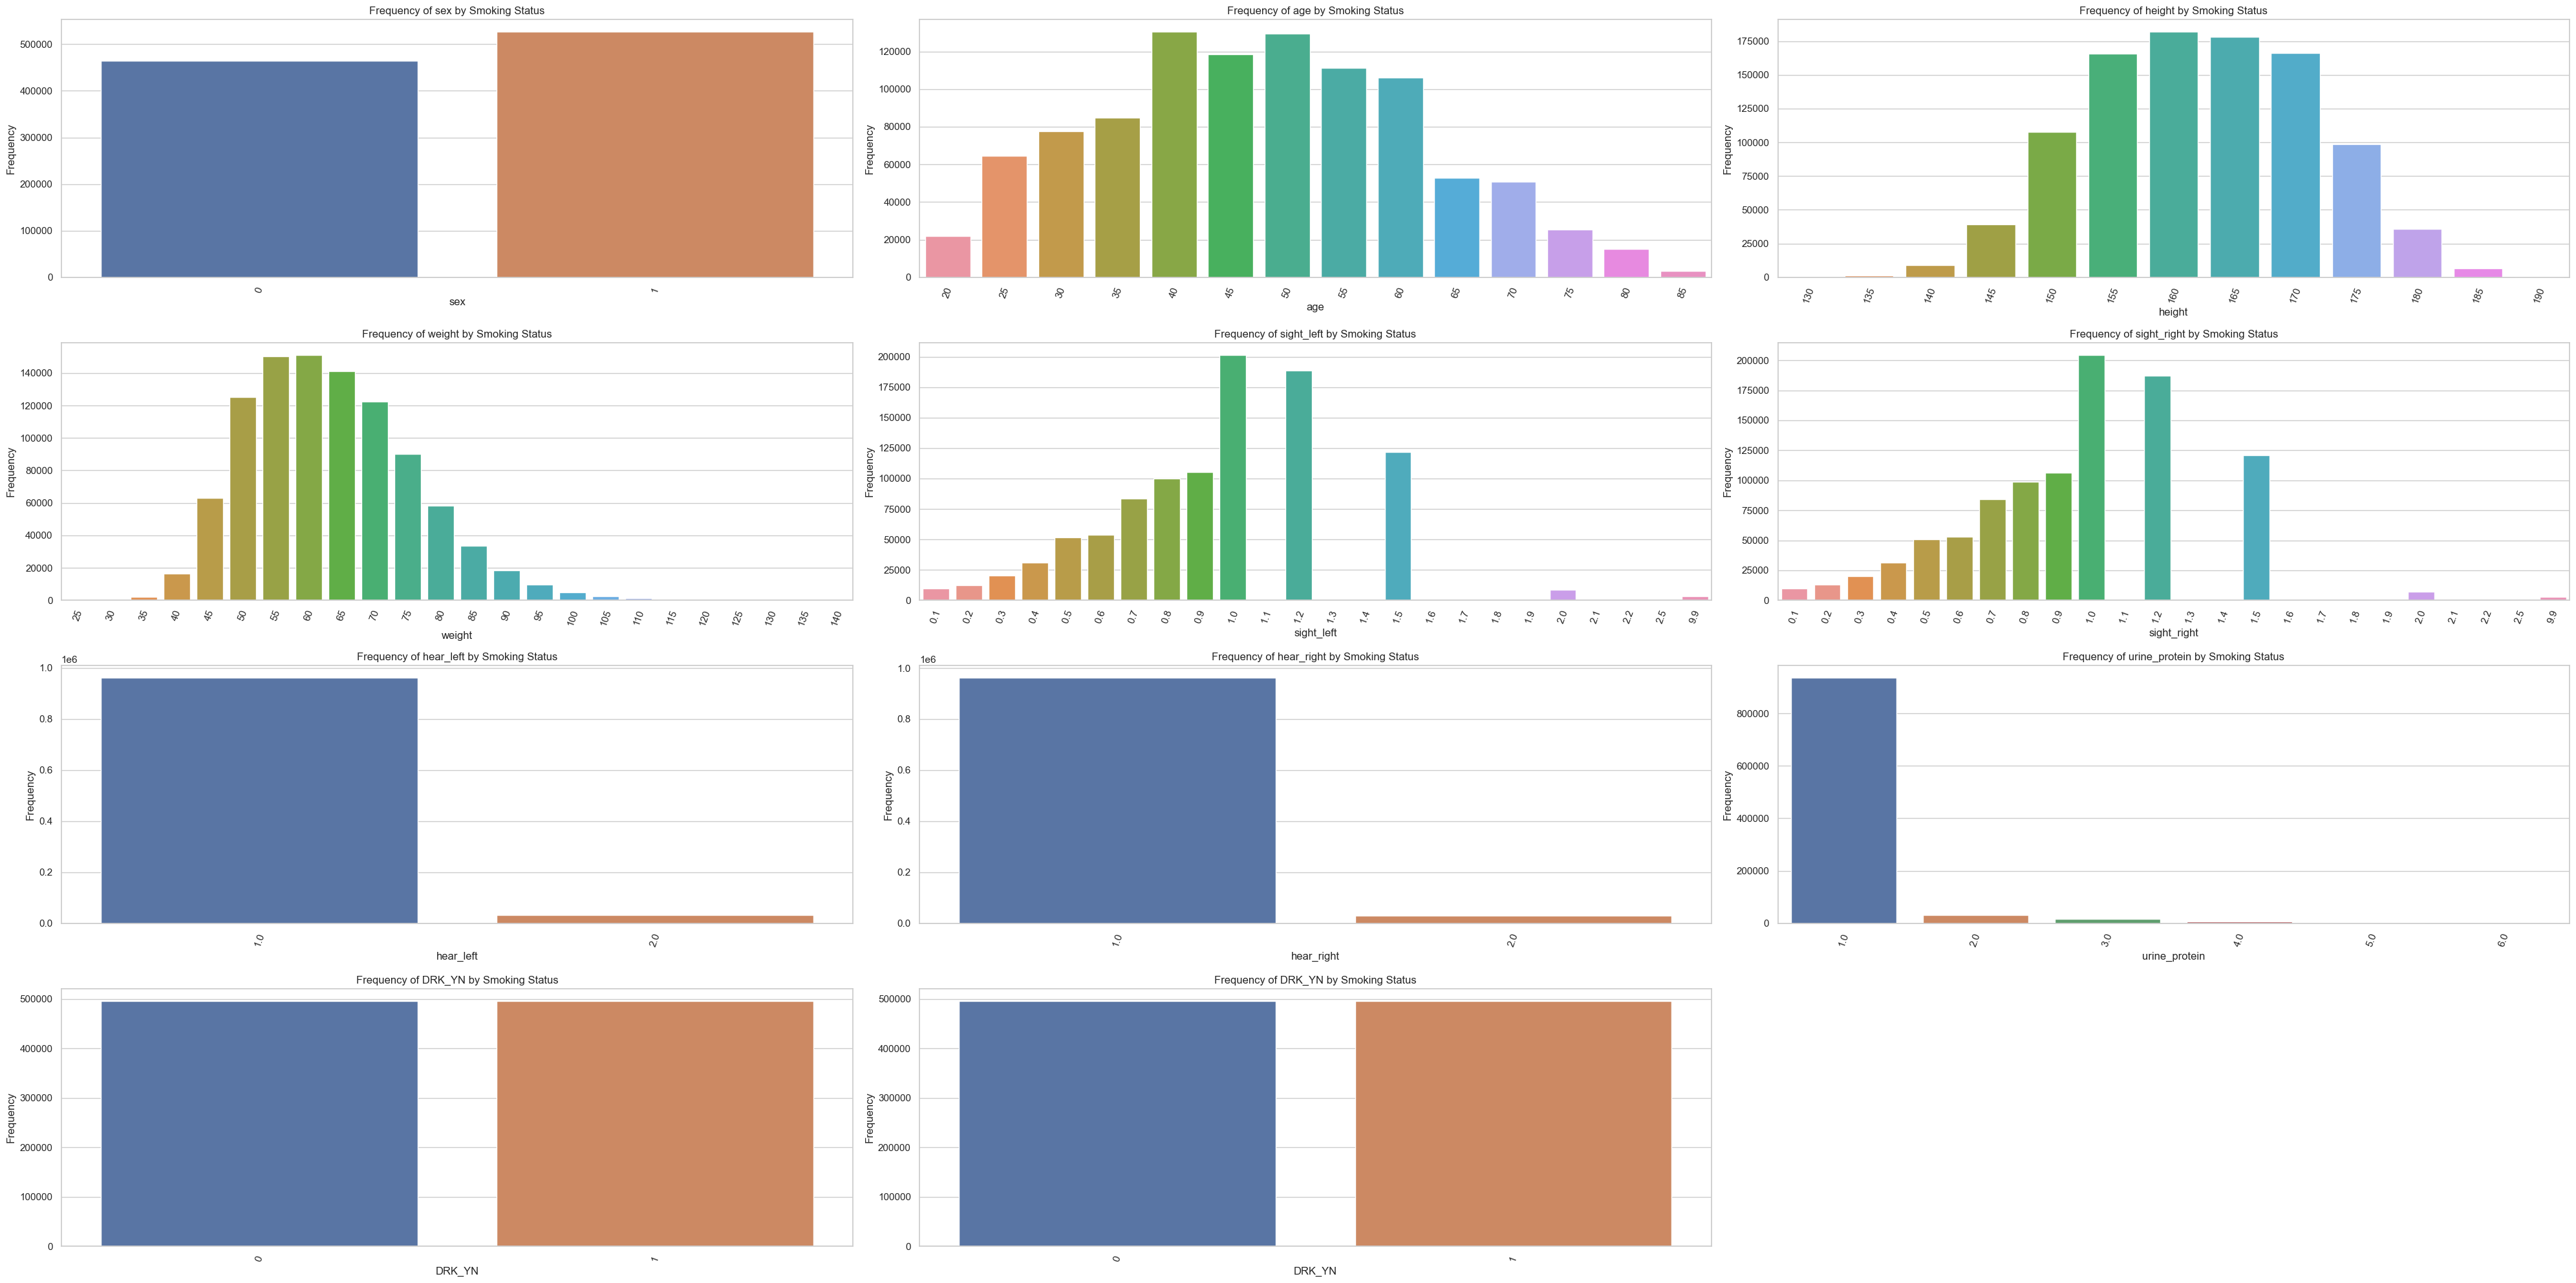

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(40, 20))

random_sample_data = data.sample(n=100000, replace=True)

for idx, column in enumerate(['sex', 'age', 'height', 'weight', 'sight_left', 'sight_right', 'hear_left', 'hear_right',
                              "urine_protein", current_y_is_smoking_or_drinking, "DRK_YN"], start=1):

    print(f'Plotting {idx}...')

    plt.subplot(4, 3, idx)

    sns.countplot(x=column, data=data)

    plt.xlabel(column)
    plt.xticks(rotation=70)
    plt.ylabel('Frequency')
    plt.title(f'Frequency of {column} by Smoking Status')

plt.tight_layout()
plt.show()

### Boxplot and removing outlier

In [18]:
data.head()

sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0    1   35     170      75       90.0         1.0          1.0        1.0   
1    1   30     180      80       89.0         0.9          1.2        1.0   
2    1   40     165      75       91.0         1.2          1.5        1.0   
3    1   50     175      80       91.0         1.5          1.2        1.0   
4    1   50     165      60       80.0         1.0          1.2        1.0   

   hear_right    SBP  ...  LDL_chole  triglyceride  hemoglobin  urine_protein  \
0         1.0  120.0  ...      126.0          92.0        17.1            1.0   
1         1.0  130.0  ...      148.0         121.0        15.8            1.0   
2         1.0  120.0  ...       74.0         104.0        15.8            1.0   
3         1.0  145.0  ...      104.0         106.0        17.6            1.0   
4         1.0  138.0  ...      117.0         104.0        13.8            1.0   

   serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  
0               1.0      21.0      35.0       40.0               1.0       1  
1               0.9      20.0      36.0       27.0               3.0       0  
2               0.9      47.0      32.0       68.0               1.0       0  
3               1.1      29.0      34.0       18.0               1.0       0  
4               0.8      19.0      12.0       25.0               1.0       0  

[5 rows x 24 columns]

In [19]:
is_smoking.head()

0    1.0
1    3.0
2    1.0
3    1.0
4    1.0
Name: SMK_stat_type_cd, dtype: float64

In [20]:
is_drinking.head()

0    1
1    0
2    0
3    0
4    0
Name: DRK_YN, dtype: int64

In [21]:
data.shape

(991346, 24)

#### ANALYZING,  'sex', 'age', 'height', 'weight', 'sight_left', 'sight_right', 'hear_left', 'hear_right'

Plotting 1...
Number of unique values :  2
Plotting 2...
Number of unique values :  14
Plotting 3...
Number of unique values :  13
Plotting 4...
Number of unique values :  24
Plotting 5...
Number of unique values :  24
Plotting 6...
Number of unique values :  24
Plotting 7...
Number of unique values :  2
Plotting 8...
Number of unique values :  2


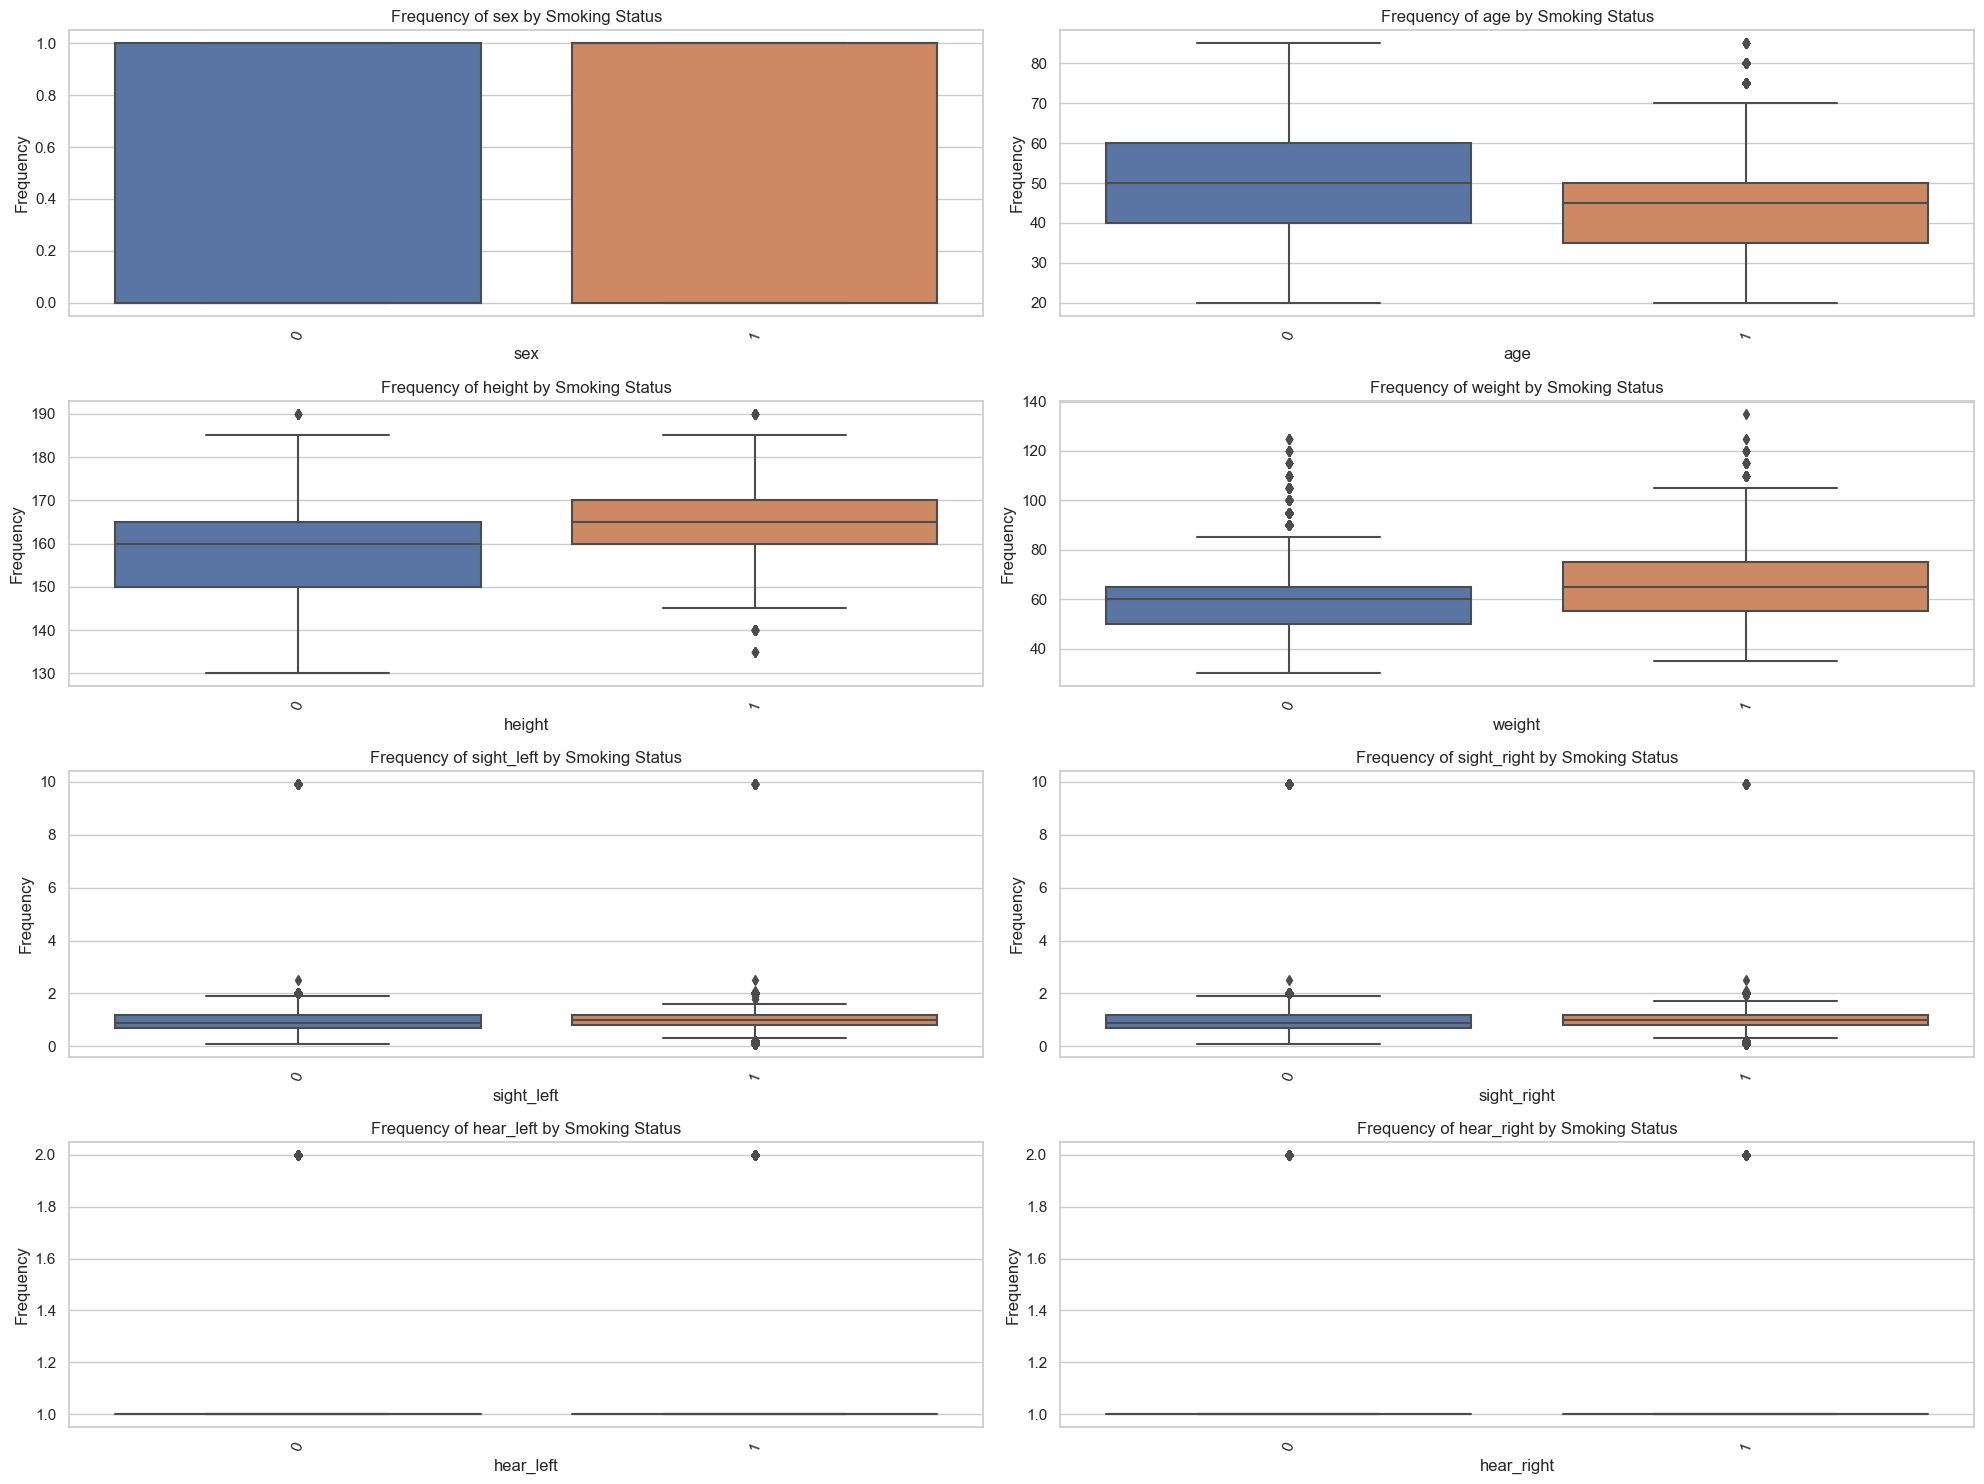

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))

random_sample_data = data.sample(n=100000, replace=True)

for idx, column in enumerate(['sex', 'age', 'height', 'weight', 'sight_left',
                              'sight_right', 'hear_left', 'hear_right'], start=1):
    print(f'Plotting {idx}...')
    print("Number of unique values : ",len(data[column].unique()))

    plt.subplot(4, 2, idx)

    sns.boxplot(x=random_sample_data[current_y_is_smoking_or_drinking],
                y=random_sample_data[column])

    plt.xlabel(column)
    plt.xticks(rotation=70)
    plt.ylabel('Frequency')
    plt.title(f'Frequency of {column} by Smoking Status')

plt.tight_layout()
plt.show()

#### ANALYZING, 'waistline' 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein', 'serum_creatinine'

Plotting 1...
Number of item greater than 0.9995 percentile: 117.5
Number of values greater than 117.5 in DBP: 494
Number of rows removed: 494
Number of unique values :  664
Plotting 2...
Number of item greater than 0.9995 percentile: 190.0
Number of values greater than 190.0 in DBP: 465
Number of rows removed: 465
Number of unique values :  121
Plotting 3...
Number of item greater than 0.9995 percentile: 120.0
Number of values greater than 120.0 in DBP: 374
Number of rows removed: 374
Number of unique values :  88
Plotting 4...
Number of item greater than 0.9995 percentile: 354.0
Number of values greater than 354.0 in DBP: 491
Number of rows removed: 491
Number of unique values :  323
Plotting 5...
Number of item greater than 0.9995 percentile: 369.0
Number of values greater than 369.0 in DBP: 485
Number of rows removed: 485
Number of unique values :  315
Plotting 6...
Number of item greater than 0.9995 percentile: 129.0
Number of values greater than 129.0 in DBP: 470
Number of rows r

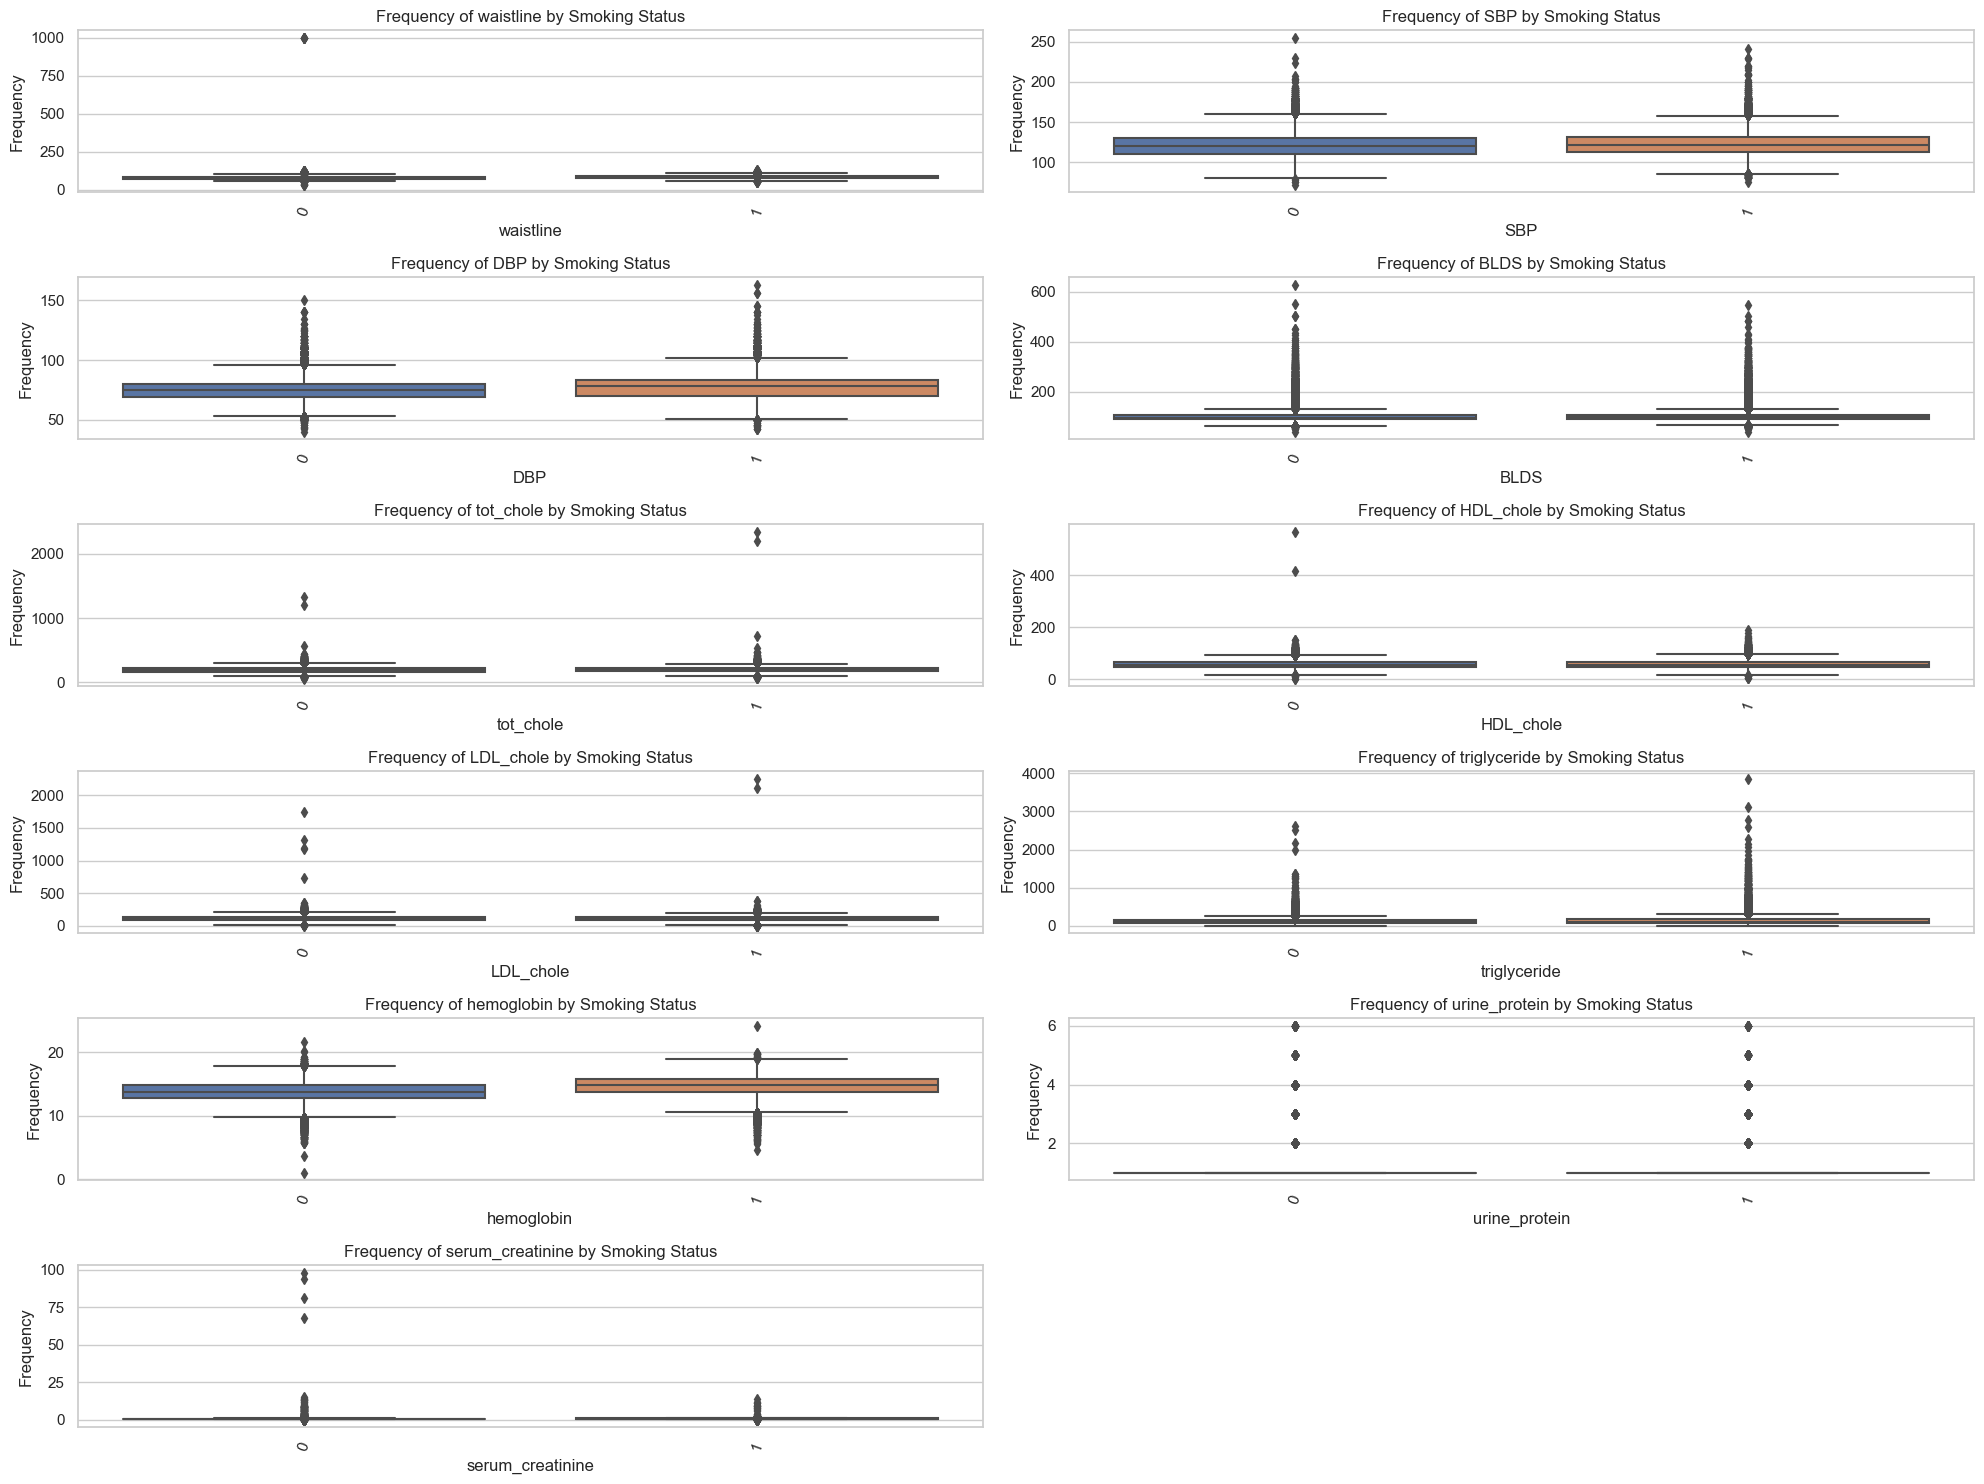

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))

random_sample_data = data.sample(n=100000, replace=True)

for idx, column in enumerate(['waistline', 'SBP', 'DBP', 'BLDS',
                              'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
                              'urine_protein', 'serum_creatinine'], start=1):
    print(f'Plotting {idx}...')

    number = 0.9995
    number_of_item_greater_than_percentile = data[column].quantile(number)
    print(
        f'Number of item greater than {number} percentile: {number_of_item_greater_than_percentile}')
    count_greater_than = (
        data[column] > number_of_item_greater_than_percentile).sum()
    print(
        f'Number of values greater than {number_of_item_greater_than_percentile} in DBP: {count_greater_than}')

    mask = data[column] > number_of_item_greater_than_percentile
    data = data[~mask]
    removed_rows = mask.sum()
    print(f'Number of rows removed: {removed_rows}')

    print("Number of unique values : ", len(data[column].unique()))

    plt.subplot(6, 2, idx)

    sns.boxplot(x=random_sample_data[current_y_is_smoking_or_drinking],
                y=random_sample_data[column])

    plt.xlabel(column)
    plt.xticks(rotation=70)
    plt.ylabel('Frequency')
    plt.title(f'Frequency of {column} by Smoking Status')

plt.tight_layout()
plt.show()

#### ANALYZING, SGOT_AST,	SGOT_ALT and gamma_GTP

Plotting 1...
Number of item greater than 0.9995 percentile: 275.9295000000857
Number of values greater than 275.9295000000857 in DBP: 494
Number of rows removed: 494
Number of unique values :  275
Plotting 2...
Number of item greater than 0.9995 percentile: 248.0
Number of values greater than 248.0 in DBP: 489
Number of rows removed: 489
Number of unique values :  248
Plotting 3...
Number of item greater than 0.9995 percentile: 793.4210000000894
Number of values greater than 793.4210000000894 in DBP: 493
Number of rows removed: 493
Number of unique values :  778


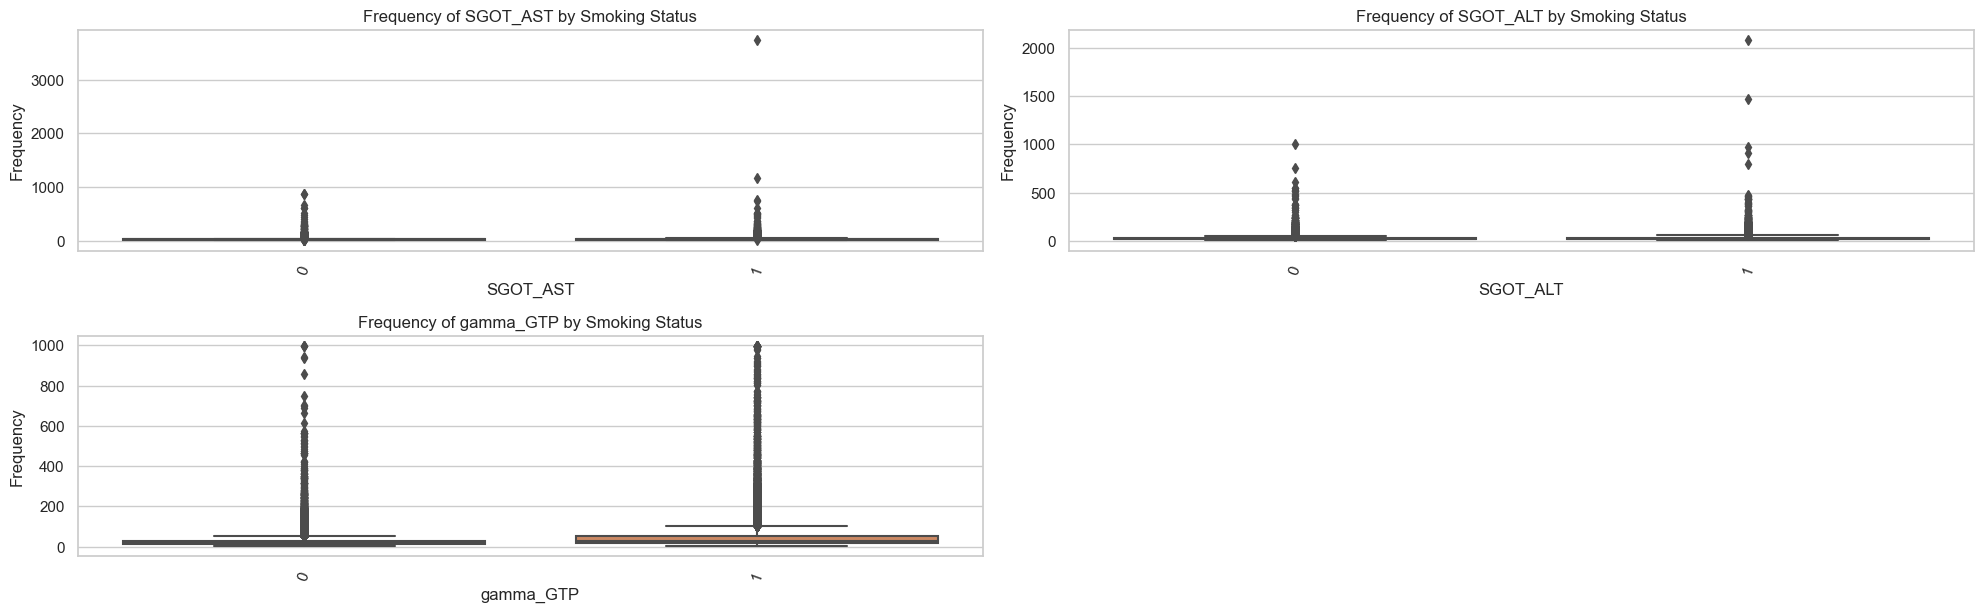

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))

random_sample_data = data.sample(n=100000, replace=True)

for idx, column in enumerate(["SGOT_AST",	"SGOT_ALT", "gamma_GTP"], start=1):
    print(f'Plotting {idx}...')
    
    number = 0.9995
    number_of_item_greater_than_percentile = data[column].quantile(number)
    print(f'Number of item greater than {number} percentile: {number_of_item_greater_than_percentile}')
    count_greater_than = (data[column] > number_of_item_greater_than_percentile).sum()
    print(
        f'Number of values greater than {number_of_item_greater_than_percentile} in DBP: {count_greater_than}')

    mask = data[column] > number_of_item_greater_than_percentile
    data = data[~mask]
    removed_rows = mask.sum()
    print(f'Number of rows removed: {removed_rows}')
    
    print("Number of unique values : ", len(data[column].unique()))

    plt.subplot(5, 2, idx)

    sns.boxplot(x=random_sample_data[current_y_is_smoking_or_drinking],
                y=random_sample_data[column])

    plt.xlabel(column)
    plt.xticks(rotation=70)
    plt.ylabel('Frequency')
    plt.title(f'Frequency of {column} by Smoking Status')

plt.tight_layout()
plt.show()

### Mean, Std Dev and Median

In [25]:
data.shape

(984666, 24)

In [26]:
for idx, column in enumerate(['sex', 'age', 'height', 'weight','waistline', 'sight_left', 'sight_right', 'hear_left', 'hear_right'], start=1):
    print(idx, " ###########################################################################")
    if current_y_is_smoking_or_drinking == 'SMK_stat_type_cd':
        for smoking_status in [1, 2, 3]:
            subset_data = data[column][is_smoking == smoking_status]
            print(f"Column: {column}, Subset {smoking_status} - Mean: {subset_data.mean():.4f}, Std Dev: {subset_data.std():.4f}, Median: {subset_data.median():.4f}")
    else:
        for drinking_status in [1, 0]:
            subset_data = data[column][is_drinking == drinking_status]
            print(f"Column: {column}, Subset {drinking_status} - Mean: {subset_data.mean():.4f}, Std Dev: {subset_data.std():.4f}, Median: {subset_data.median():.4f}")


1  ###########################################################################
Column: sex, Subset 1 - Mean: 0.7142, Std Dev: 0.4518, Median: 1.0000
Column: sex, Subset 0 - Mean: 0.3461, Std Dev: 0.4757, Median: 0.0000
2  ###########################################################################
Column: age, Subset 1 - Mean: 43.5656, Std Dev: 12.7686, Median: 45.0000
Column: age, Subset 0 - Mean: 51.6458, Std Dev: 14.3752, Median: 50.0000
3  ###########################################################################
Column: height, Subset 1 - Mean: 165.7109, Std Dev: 8.2745, Median: 165.0000
Column: height, Subset 0 - Mean: 158.7539, Std Dev: 8.9238, Median: 160.0000
4  ###########################################################################
Column: weight, Subset 1 - Mean: 66.5488, Std Dev: 12.5126, Median: 65.0000
Column: weight, Subset 0 - Mean: 59.9424, Std Dev: 11.4865, Median: 60.0000
5  ###########################################################################
Column: waist

In [27]:
for idx, column in enumerate(['SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein', 'serum_creatinine'], start=1):
    print(idx, " ###########################################################################")
    if current_y_is_smoking_or_drinking == 'SMK_stat_type_cd':
        for smoking_status in [1, 2, 3]:
            subset_data = data[column][is_smoking == smoking_status]
            print(f"Column: {column}, Subset {smoking_status} - Mean: {subset_data.mean():.4f}, Std Dev: {subset_data.std():.4f}, Median: {subset_data.median():.4f}")
    else:
        for drinking_status in [1, 0]:
            subset_data = data[column][is_drinking == drinking_status]
            print(f"Column: {column}, Subset {drinking_status} - Mean: {subset_data.mean():.4f}, Std Dev: {subset_data.std():.4f}, Median: {subset_data.median():.4f}")

1  ###########################################################################
Column: SBP, Subset 1 - Mean: 122.8007, Std Dev: 13.9798, Median: 121.0000
Column: SBP, Subset 0 - Mean: 121.8779, Std Dev: 14.7644, Median: 120.0000
2  ###########################################################################
Column: DBP, Subset 1 - Mean: 76.9720, Std Dev: 9.8729, Median: 78.0000
Column: DBP, Subset 0 - Mean: 75.0155, Std Dev: 9.5952, Median: 75.0000
3  ###########################################################################
Column: BLDS, Subset 1 - Mean: 100.5050, Std Dev: 22.6543, Median: 96.0000
Column: BLDS, Subset 0 - Mean: 99.8455, Std Dev: 23.0430, Median: 95.0000
4  ###########################################################################
Column: tot_chole, Subset 1 - Mean: 195.9719, Std Dev: 36.5693, Median: 194.0000
Column: tot_chole, Subset 0 - Mean: 194.5913, Std Dev: 38.5203, Median: 193.0000
5  ###########################################################################


In [28]:
for idx, column in enumerate(['SGOT_AST', 'SGOT_ALT', 'gamma_GTP'], start=1):
    print(idx, " ###########################################################################")
    if current_y_is_smoking_or_drinking == 'SMK_stat_type_cd':
        for smoking_status in [1, 2, 3]:
            subset_data = data[column][is_smoking == smoking_status]
            print(f"Column: {column}, Subset {smoking_status} - Mean: {subset_data.mean():.4f}, Std Dev: {subset_data.std():.4f}, Median: {subset_data.median():.4f}")
    else:
        for drinking_status in [1, 0]:
            subset_data = data[column][is_drinking == drinking_status]
            print(f"Column: {column}, Subset {drinking_status} - Mean: {subset_data.mean():.4f}, Std Dev: {subset_data.std():.4f}, Median: {subset_data.median():.4f}")

1  ###########################################################################
Column: SGOT_AST, Subset 1 - Mean: 26.3614, Std Dev: 13.8192, Median: 23.0000
Column: SGOT_AST, Subset 0 - Mean: 24.8094, Std Dev: 11.4750, Median: 22.0000
2  ###########################################################################
Column: SGOT_ALT, Subset 1 - Mean: 26.8477, Std Dev: 19.7623, Median: 21.0000
Column: SGOT_ALT, Subset 0 - Mean: 23.7632, Std Dev: 17.2751, Median: 19.0000
3  ###########################################################################
Column: gamma_GTP, Subset 1 - Mean: 46.0817, Std Dev: 54.6494, Median: 29.0000
Column: gamma_GTP, Subset 0 - Mean: 26.4893, Std Dev: 27.6721, Median: 19.0000


### countplot by hue

1
2
3
4
5
6
7
8
9


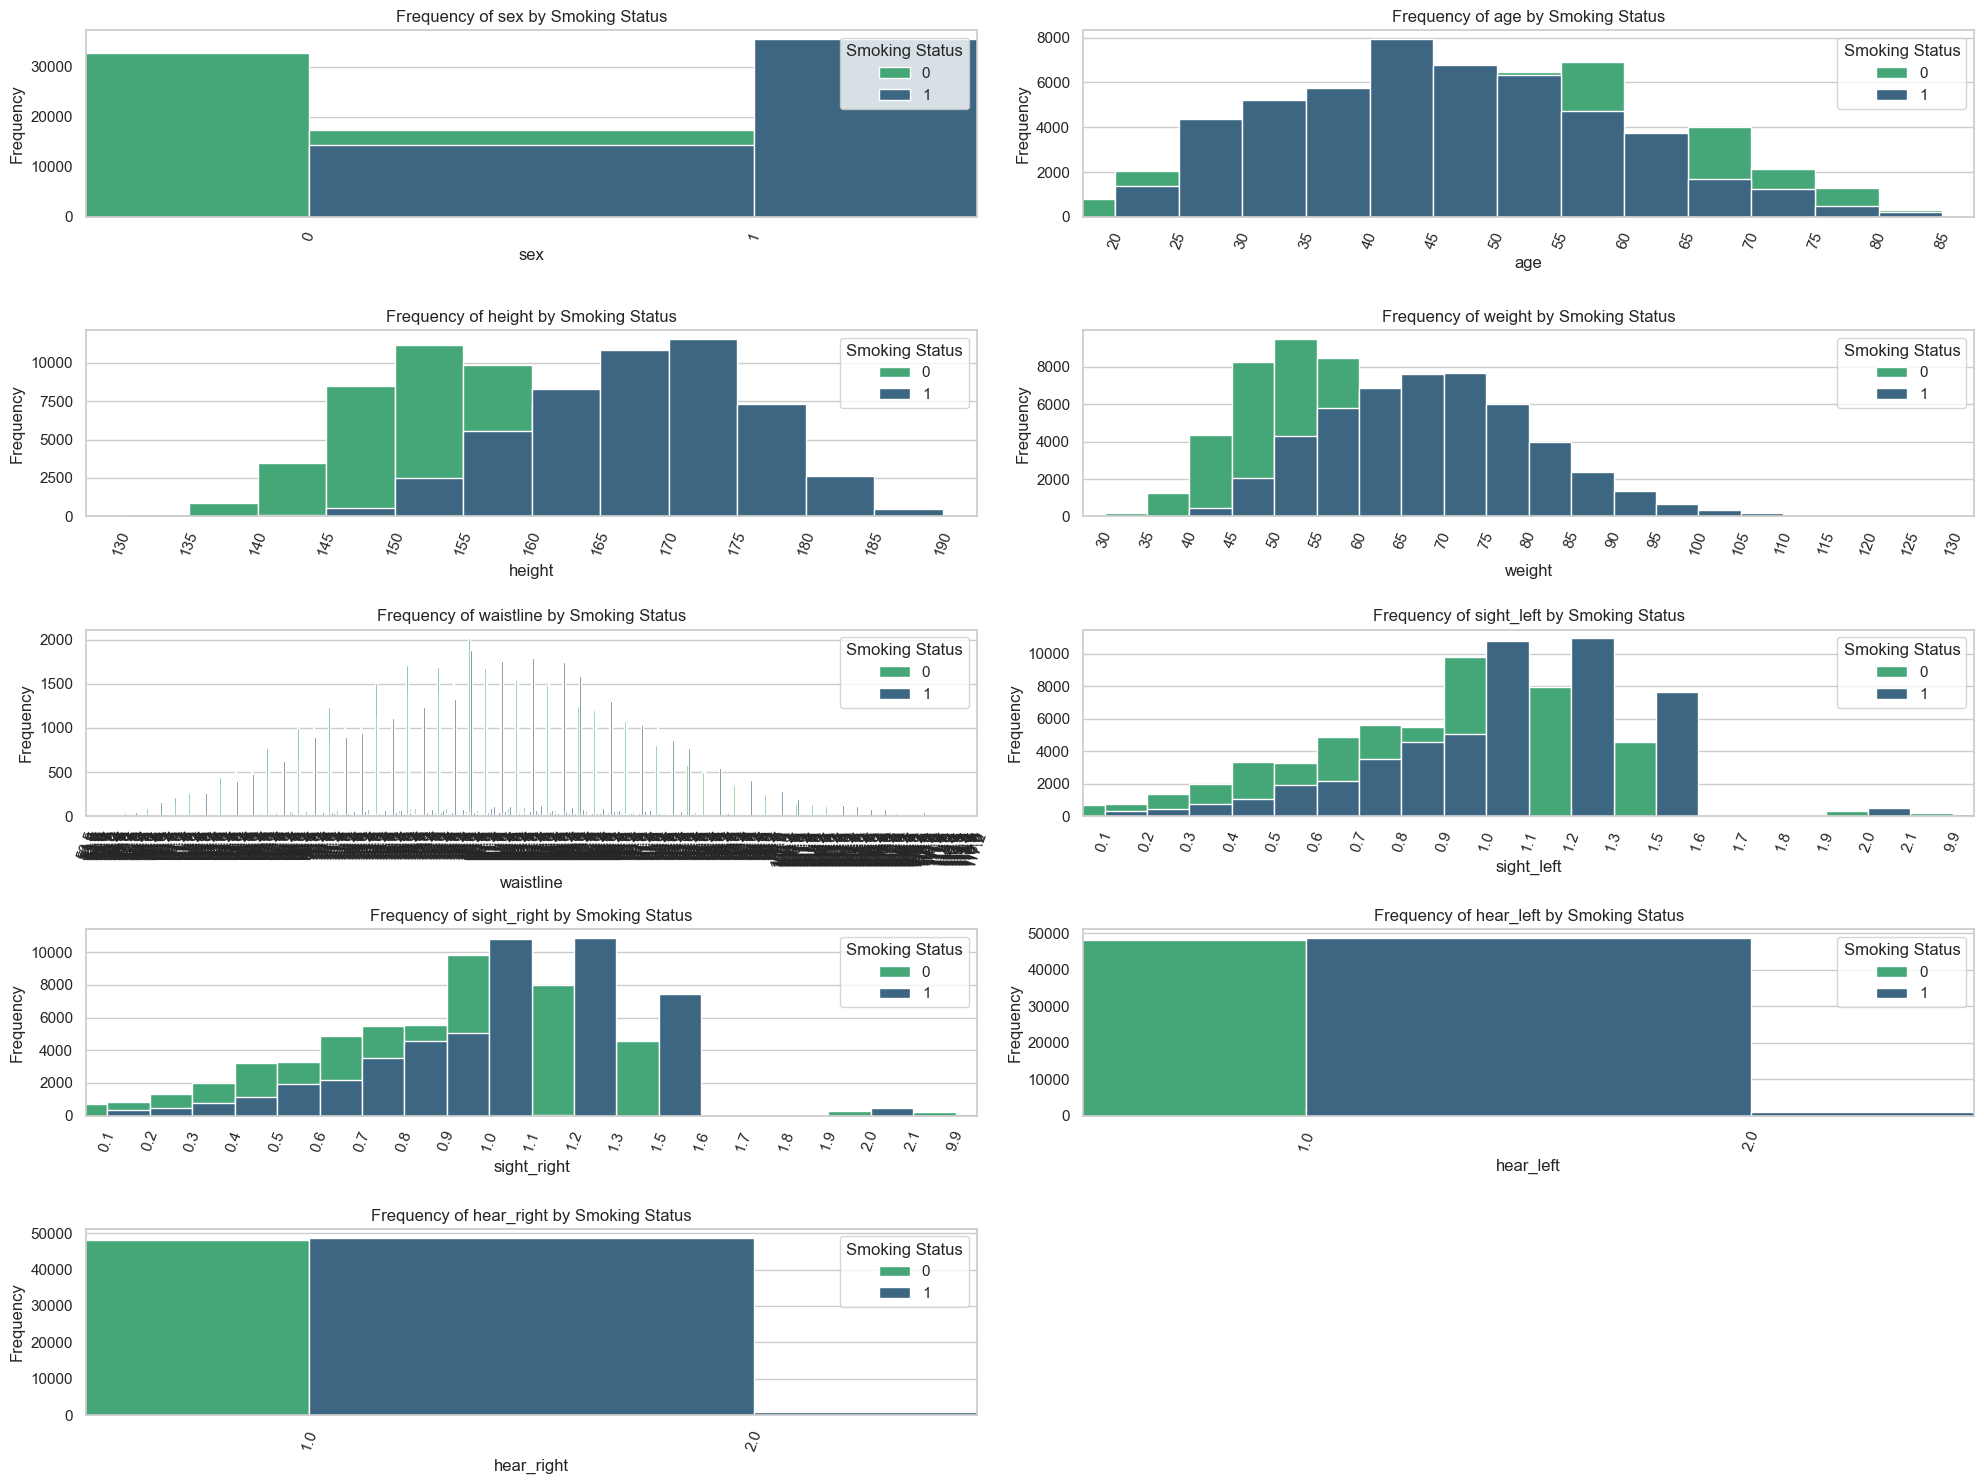

In [29]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))

random_sample_data = data.sample(n=100000, replace=True)

for idx, column in enumerate(['sex', 'age', 'height', 'weight','waistline', 'sight_left', 'sight_right', 'hear_left', 'hear_right'], start=1):
    plt.subplot(5, 2, idx)

    sns.countplot(x=column, hue=current_y_is_smoking_or_drinking, palette=f'viridis_r',
                  data=random_sample_data , width=2,)

    plt.xlabel(column)
    plt.xticks(rotation=70)
    plt.ylabel('Frequency')
    plt.title(f'Frequency of {column} by Smoking Status')
    plt.legend(title='Smoking Status', loc='upper right')

    print(idx)
plt.tight_layout()
plt.show()

1
2
3
4
5
6
7
8
9
10


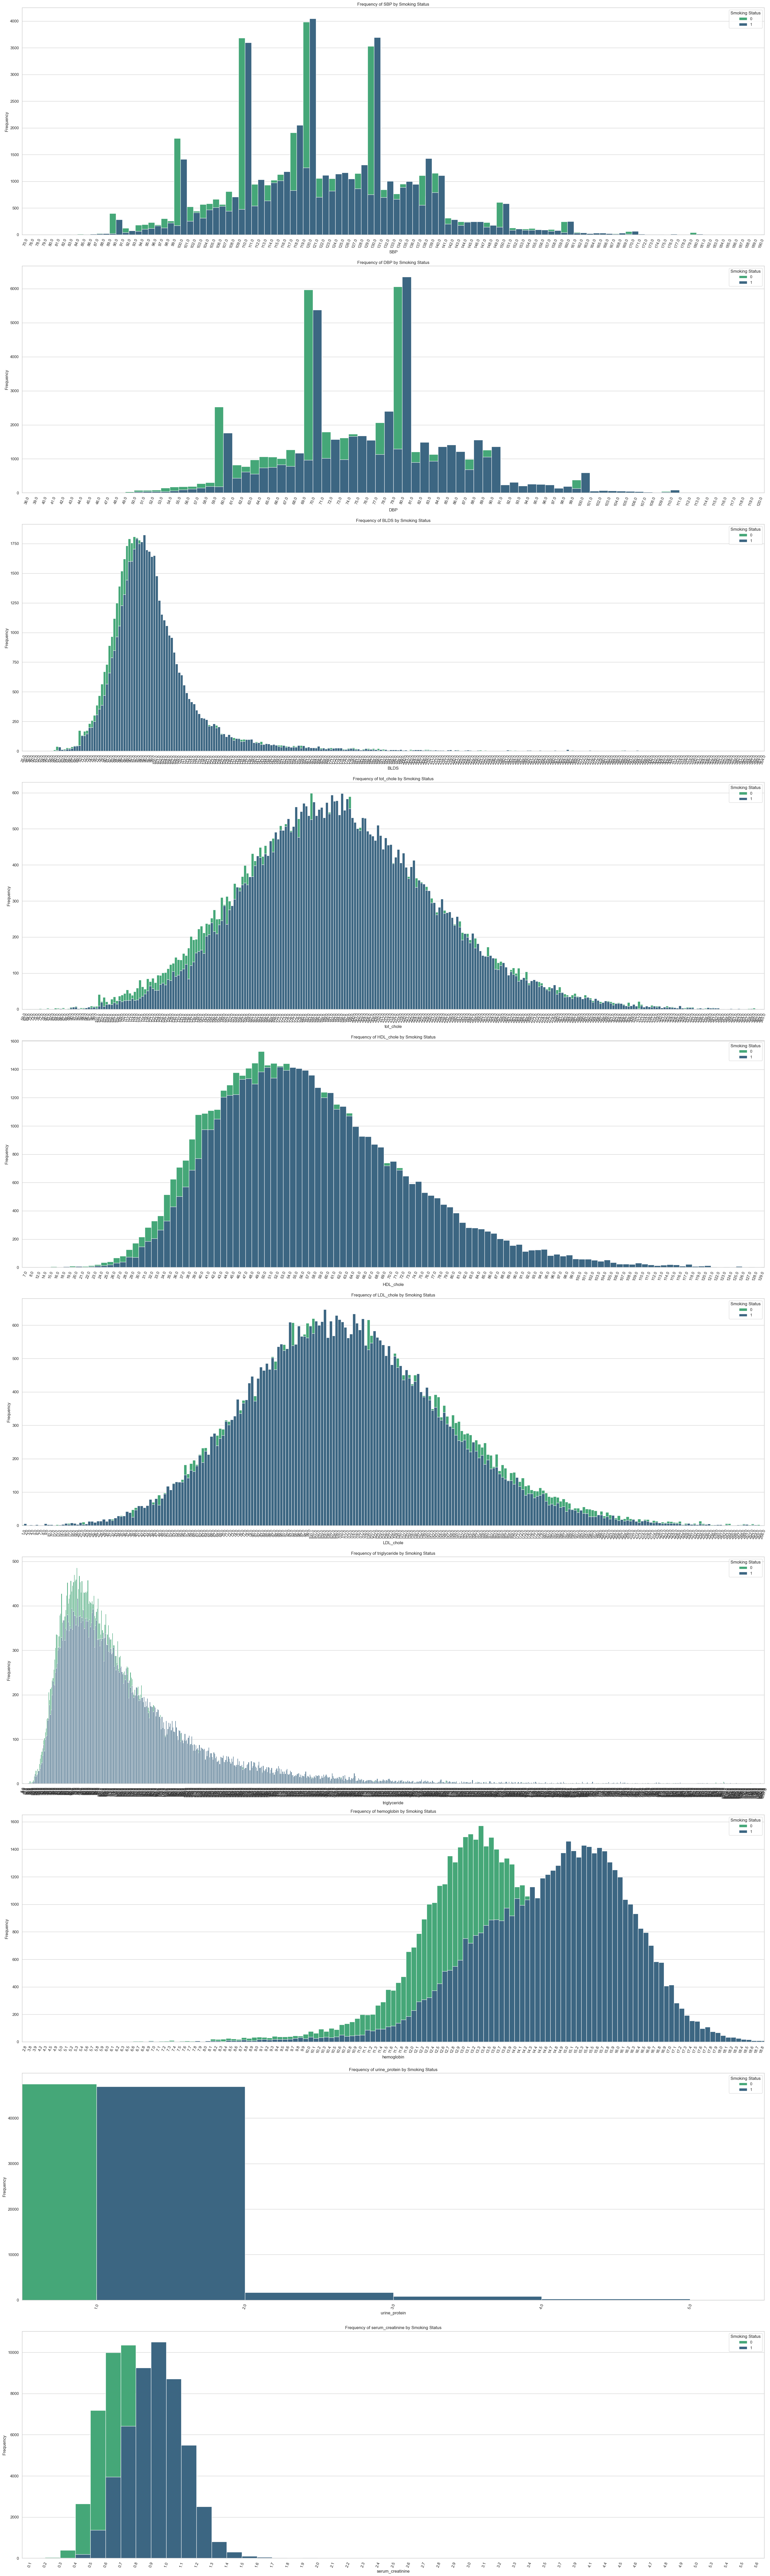

In [30]:
sns.set(style="whitegrid")
plt.figure(figsize=(30, 100))

random_sample_data = data.sample(n=100000, replace=True)

for idx, column in enumerate(['SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein', 'serum_creatinine'], start=1):
    plt.subplot(10, 1, idx)

    sns.countplot(x=column, hue=current_y_is_smoking_or_drinking, palette=f'viridis_r',
                  data=random_sample_data , width=2,)

    plt.xlabel(column)
    plt.xticks(rotation=70)
    plt.ylabel('Frequency')
    plt.title(f'Frequency of {column} by Smoking Status')
    plt.legend(title='Smoking Status', loc='upper right')

    print(idx)
plt.tight_layout()
plt.show()

1
2
3


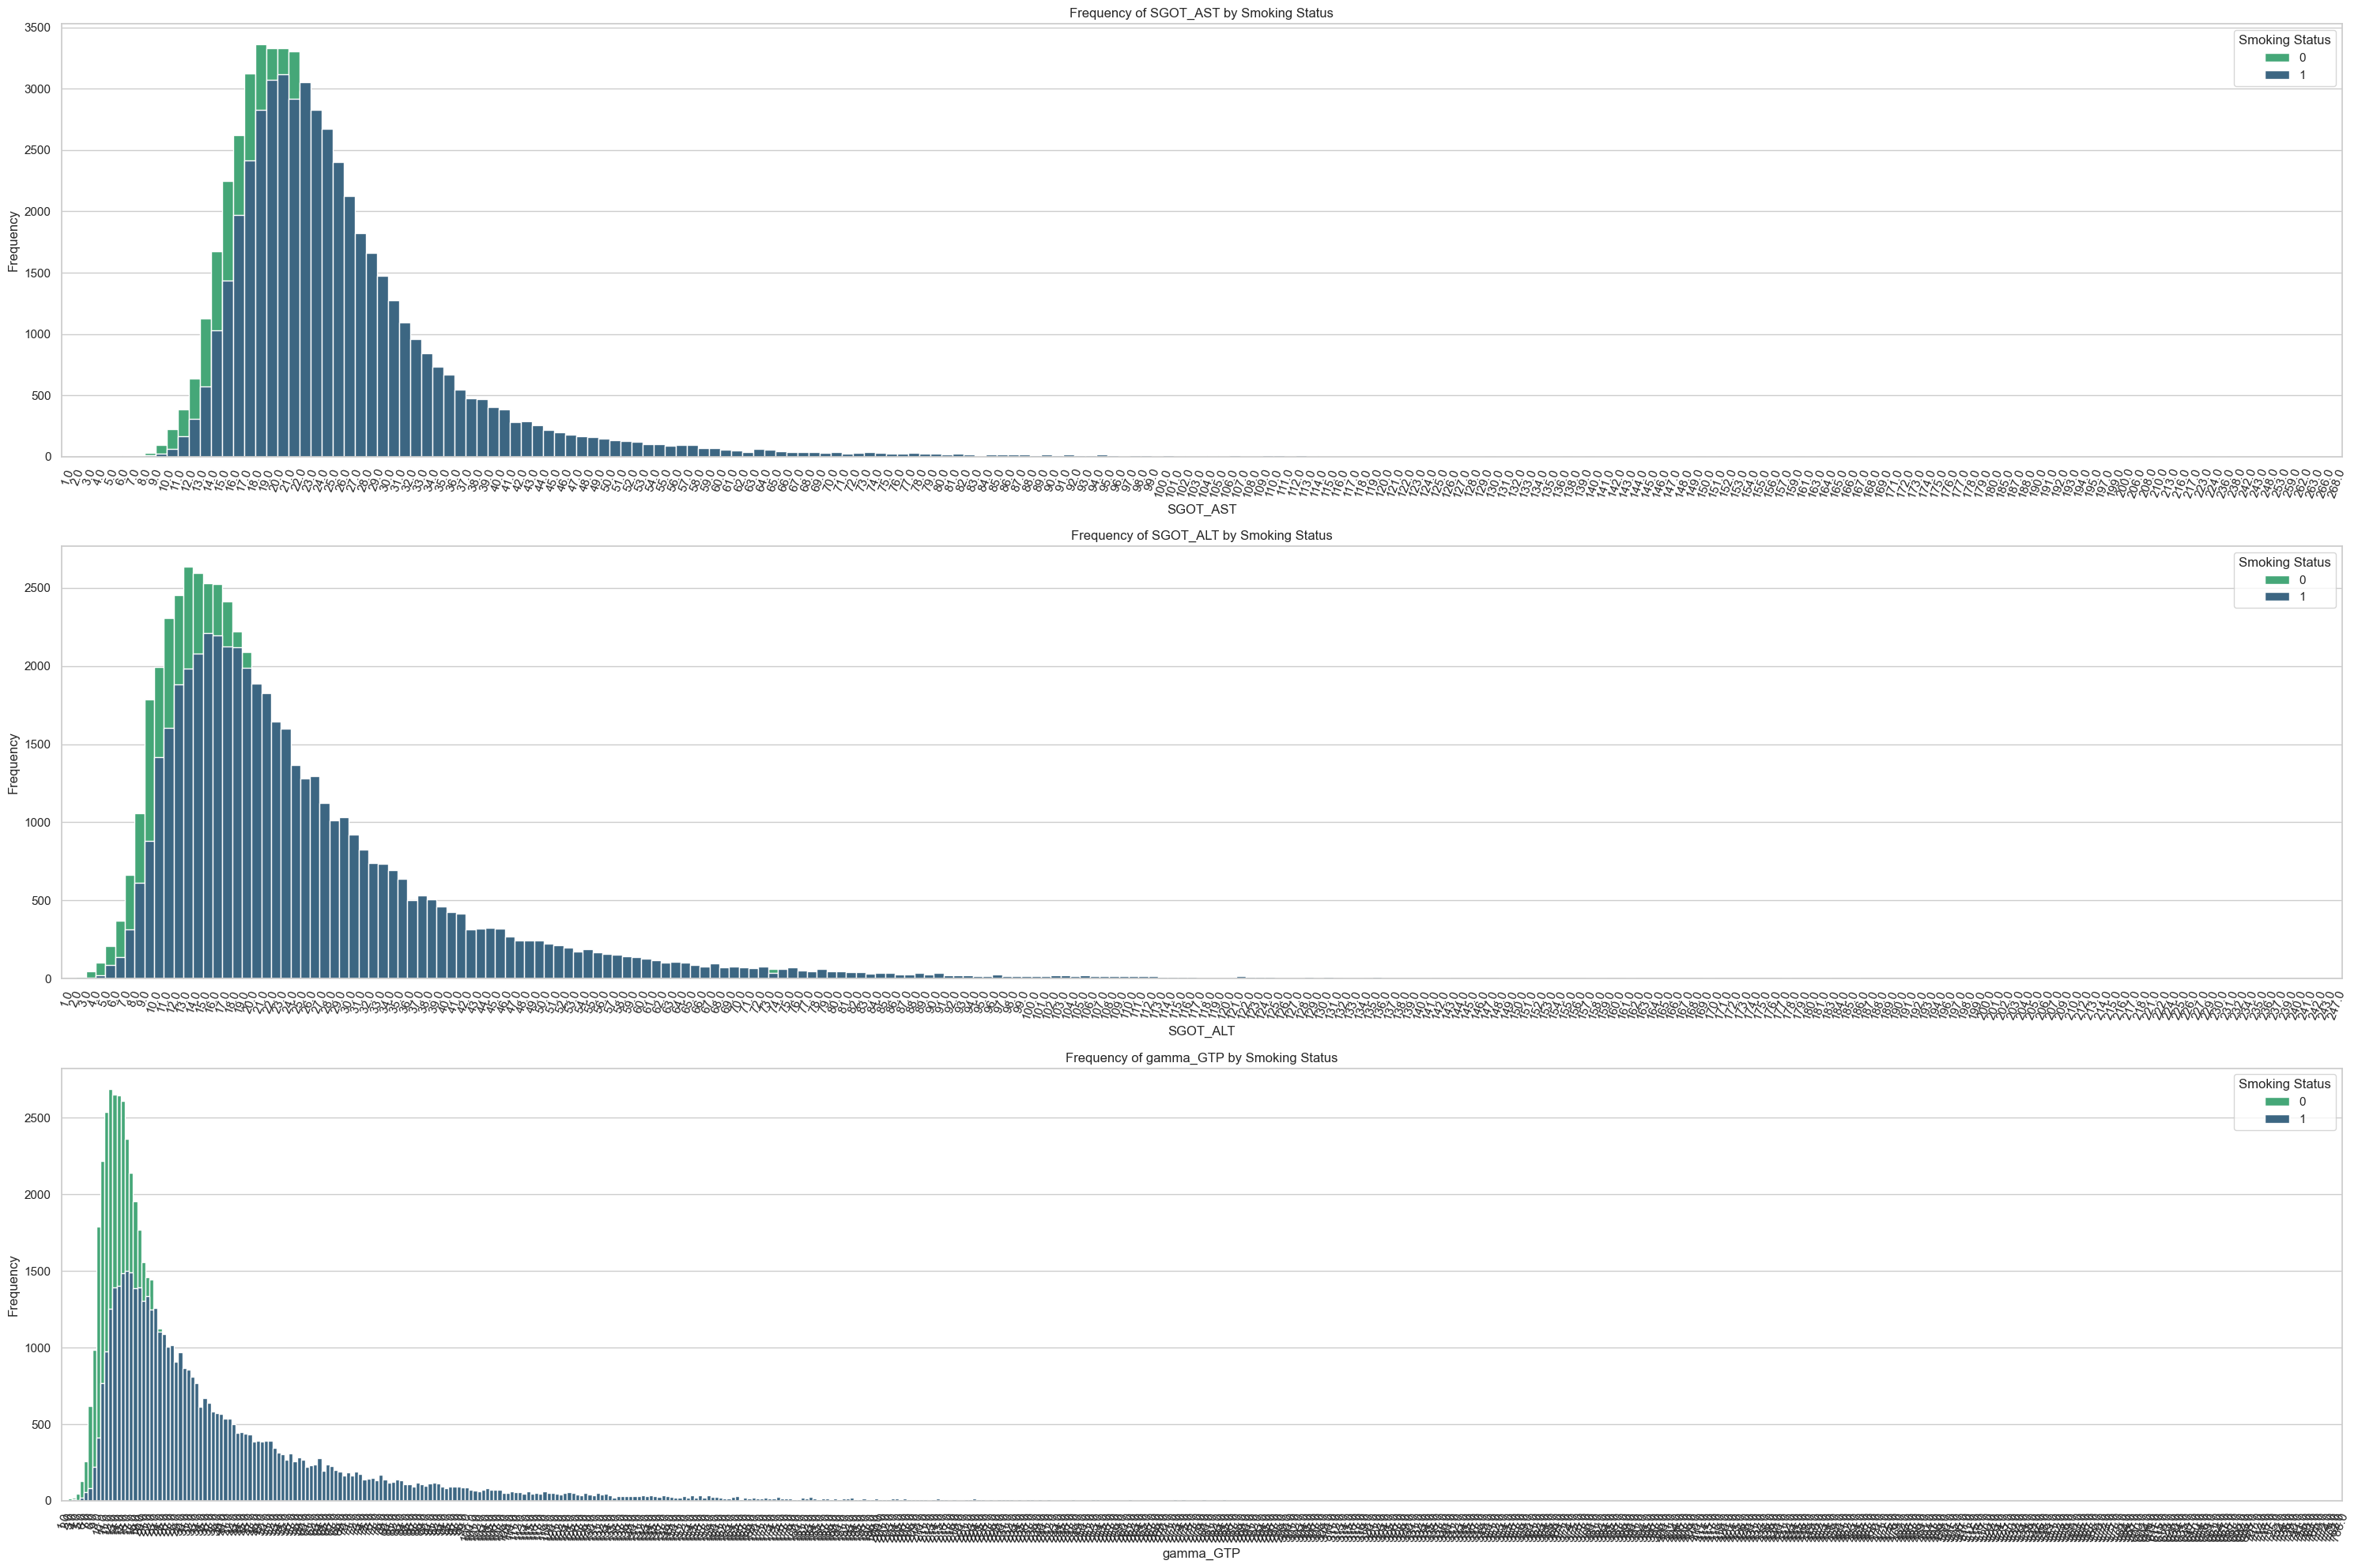

In [31]:
sns.set(style="whitegrid")
plt.figure(figsize=(30, 20))

random_sample_data = data.sample(n=100000, replace=True)

for idx, column in enumerate(['SGOT_AST', 'SGOT_ALT', 'gamma_GTP'], start=1):
    plt.subplot(3, 1, idx)

    sns.countplot(x=column, hue=current_y_is_smoking_or_drinking, palette=f'viridis_r',
                  data=random_sample_data , width=2,)

    plt.xlabel(column)
    plt.xticks(rotation=70)
    plt.ylabel('Frequency')
    plt.title(f'Frequency of {column} by Smoking Status')
    plt.legend(title='Smoking Status', loc='upper right')

    print(idx)
plt.tight_layout()
plt.show()

### Heatmap

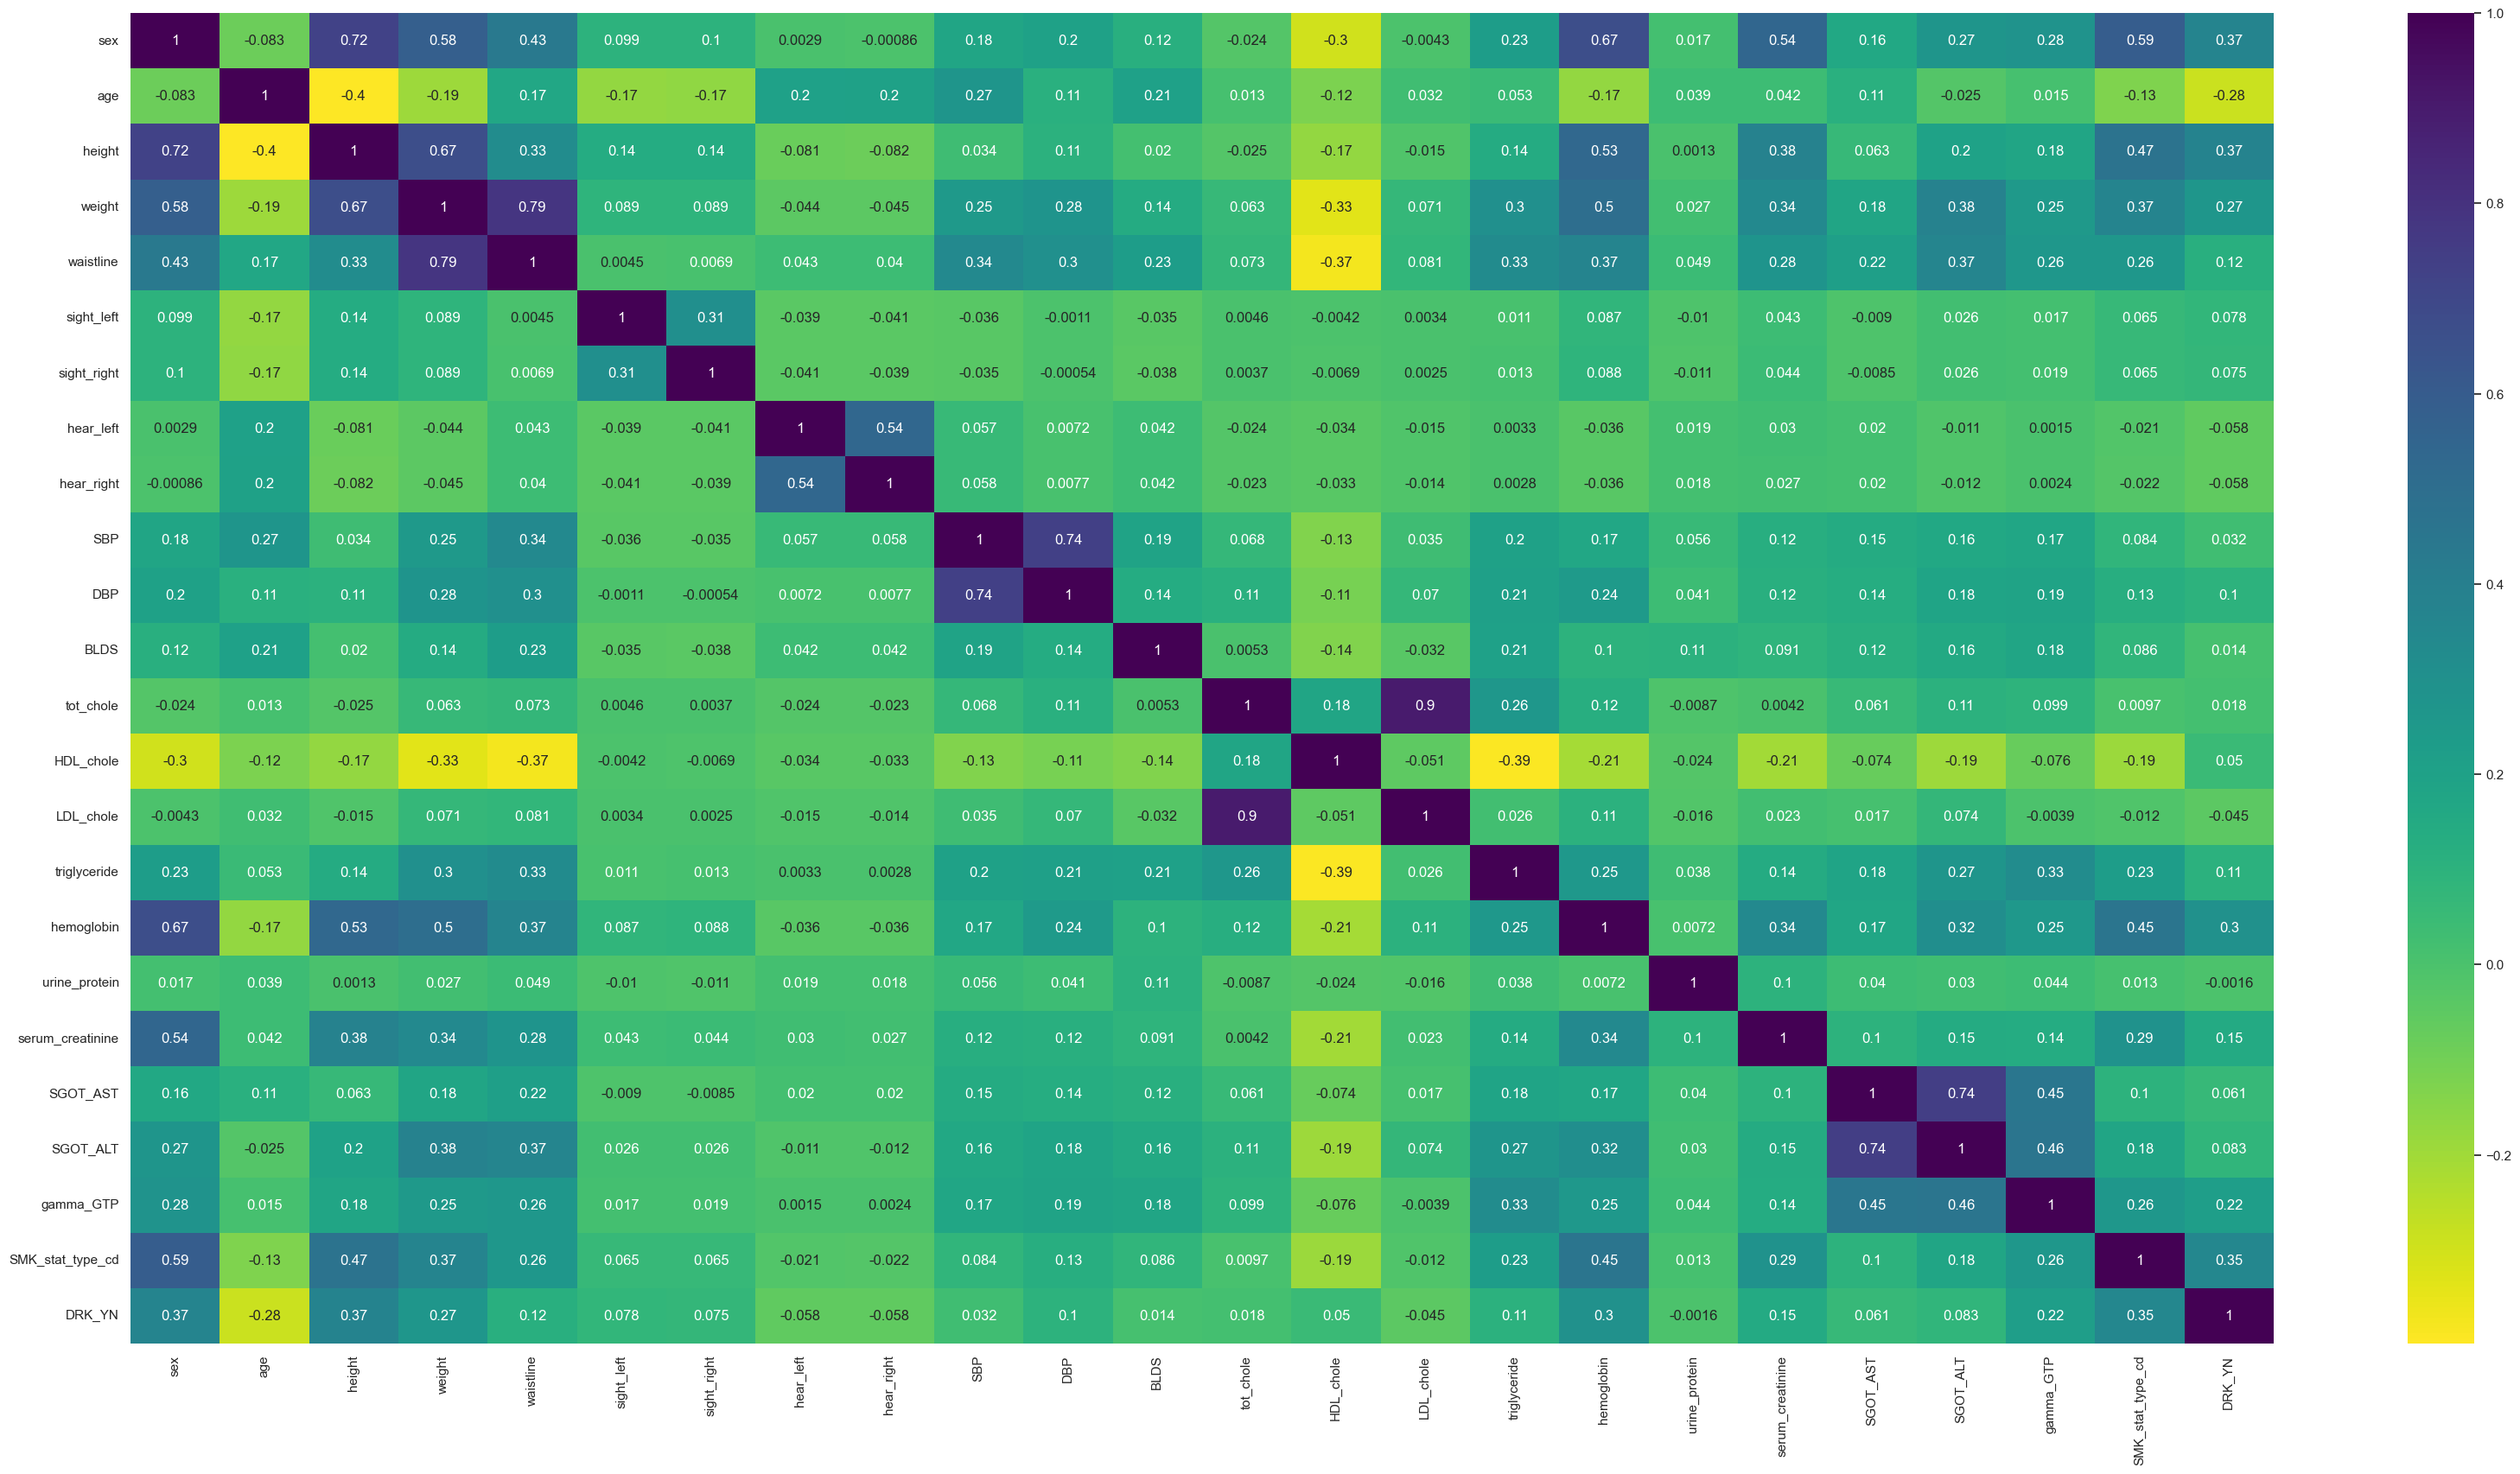

In [32]:
def heatmap():
    plt.figure(figsize=(40, 20))
    sns.heatmap(data.corr(), annot=True, cmap='viridis_r')
    plt.show()
heatmap()

### Pair Plots

In [33]:
data.head()

sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0    1   35     170      75       90.0         1.0          1.0        1.0   
1    1   30     180      80       89.0         0.9          1.2        1.0   
2    1   40     165      75       91.0         1.2          1.5        1.0   
3    1   50     175      80       91.0         1.5          1.2        1.0   
4    1   50     165      60       80.0         1.0          1.2        1.0   

   hear_right    SBP  ...  LDL_chole  triglyceride  hemoglobin  urine_protein  \
0         1.0  120.0  ...      126.0          92.0        17.1            1.0   
1         1.0  130.0  ...      148.0         121.0        15.8            1.0   
2         1.0  120.0  ...       74.0         104.0        15.8            1.0   
3         1.0  145.0  ...      104.0         106.0        17.6            1.0   
4         1.0  138.0  ...      117.0         104.0        13.8            1.0   

   serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  
0               1.0      21.0      35.0       40.0               1.0       1  
1               0.9      20.0      36.0       27.0               3.0       0  
2               0.9      47.0      32.0       68.0               1.0       0  
3               1.1      29.0      34.0       18.0               1.0       0  
4               0.8      19.0      12.0       25.0               1.0       0  

[5 rows x 24 columns]

In [34]:
data.columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')

In [35]:
def pairplot(data):
    print(data.head())
    sns.pairplot(data=data, hue=current_y_is_smoking_or_drinking, markers=["o", "s"])
    plt.show()

#### Pair Plots betwween age , height , weight , waistline

        age  height  weight  waistline  DRK_YN
512403   70     150      60       83.5       0
380211   60     155      60       87.2       0
108108   60     170      65       77.0       0
140793   60     155      45       69.0       0
475671   40     170      70       87.8       0


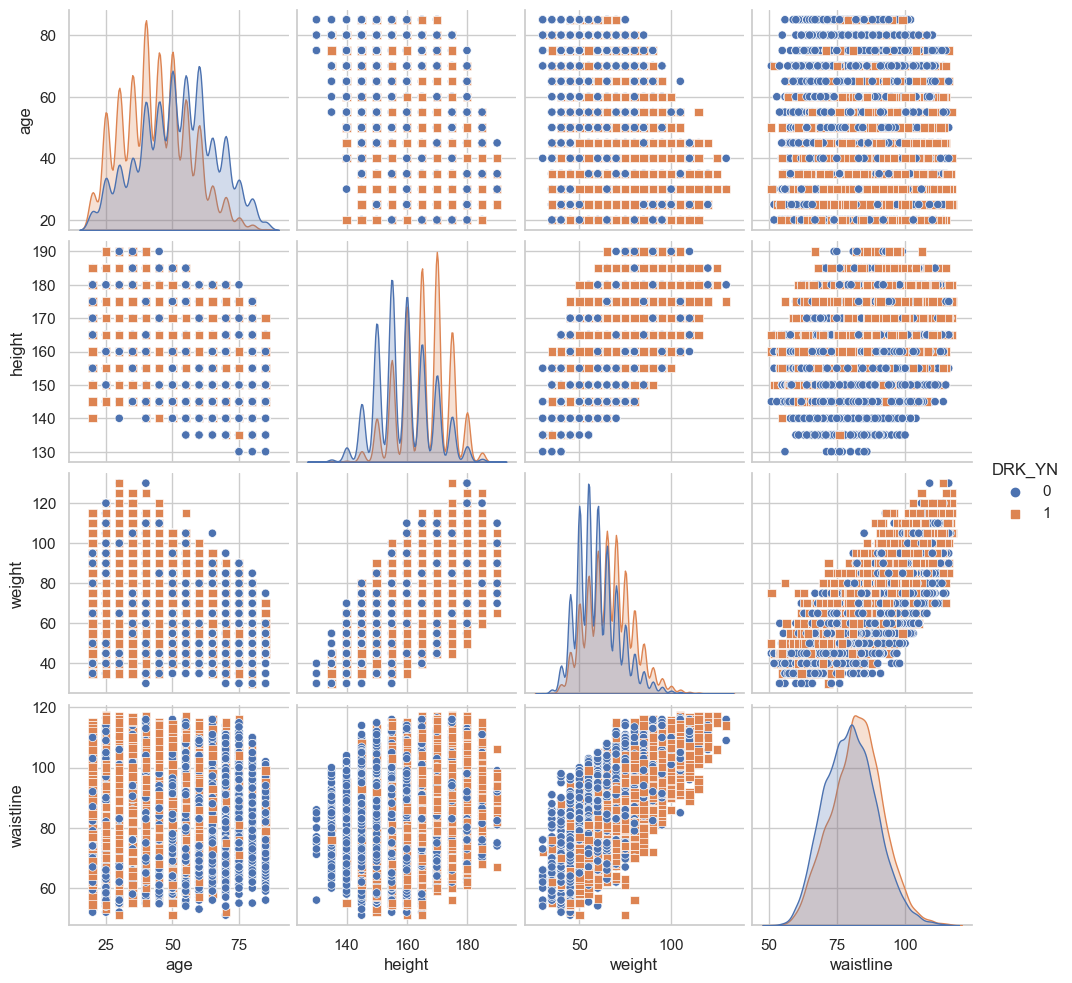

In [36]:
data_changed = {
    'age': data["age"], 'height': data["height"], 'weight': data["weight"], 'waistline': data["waistline"], current_y_is_smoking_or_drinking: data[current_y_is_smoking_or_drinking],
}

data_changed = pd.DataFrame(data_changed)

random_sample_data = data_changed.sample(n=100000, replace=True)

pairplot(random_sample_data)

#### Pair Plots betwween sight_left, sight_right, hear_left, hear_right

        sight_left  sight_right  hear_left  hear_right  DRK_YN
338517         0.6          0.7        1.0         1.0       0
36872          1.5          1.2        1.0         1.0       0
154700         1.0          1.0        1.0         1.0       1
938551         1.0          0.9        1.0         1.0       1
415925         1.5          1.5        1.0         1.0       0


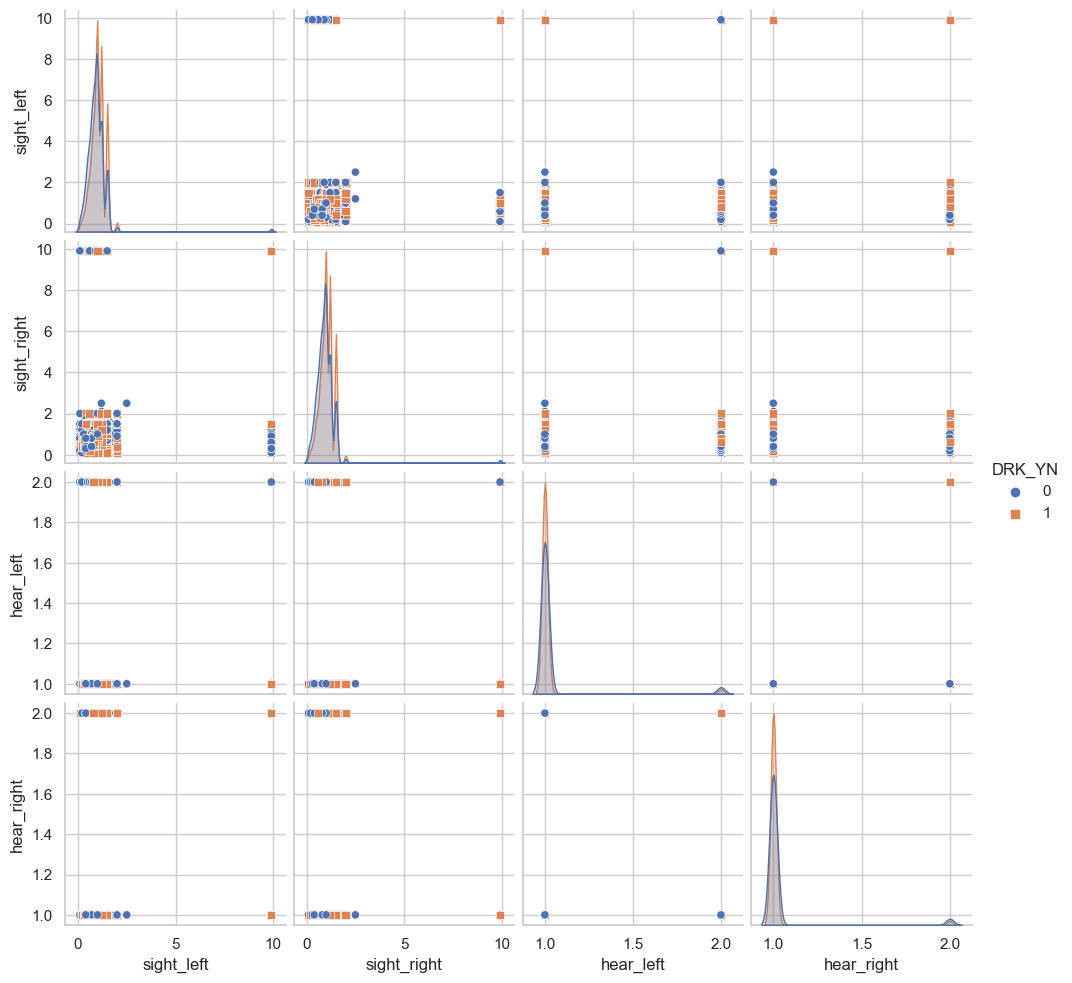

In [37]:
data_changed = {
    'sight_left': data["sight_left"], 'sight_right': data["sight_right"], 'hear_left': data["hear_left"], "hear_right": data["hear_right"], current_y_is_smoking_or_drinking: data[current_y_is_smoking_or_drinking],
}

data_changed = pd.DataFrame(data_changed)

random_sample_data = data_changed.sample(n=100000, replace=True)

pairplot(random_sample_data)

#### Pair Plots between sbp, sbp and blds 

          SBP   DBP   BLDS  DRK_YN
445235  108.0  65.0   91.0       1
508151  109.0  64.0   88.0       0
463763  120.0  80.0  116.0       0
771019  131.0  80.0  113.0       0
860995  131.0  92.0   93.0       1


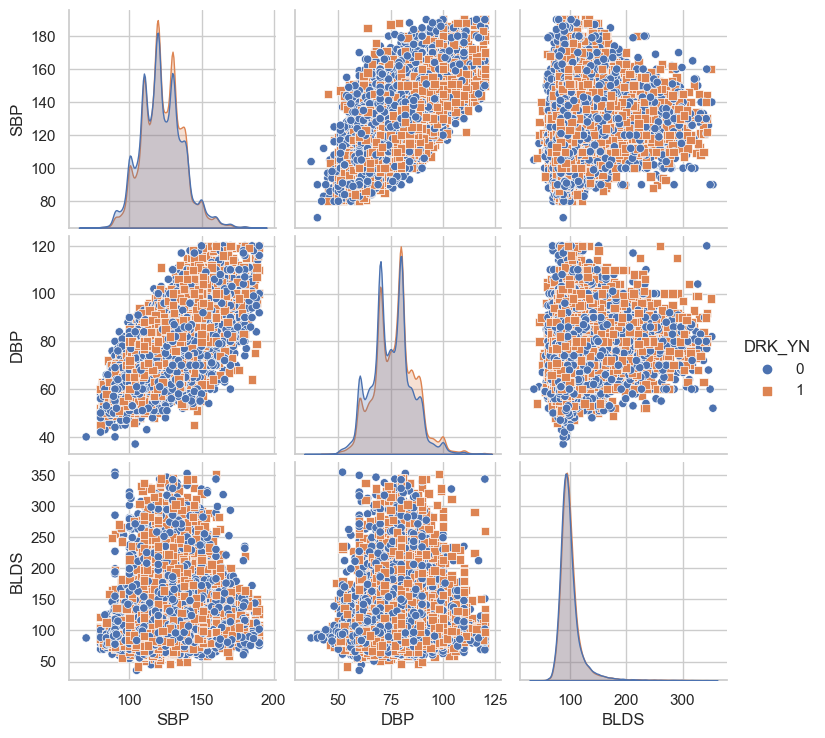

In [38]:
data_changed = {
    'SBP': data["SBP"], 'DBP': data["DBP"], 'BLDS': data["BLDS"], current_y_is_smoking_or_drinking: data[current_y_is_smoking_or_drinking],
}

data_changed = pd.DataFrame(data_changed)

random_sample_data = data_changed.sample(n=100000, replace=True)

pairplot(random_sample_data)

#### Pair Plots between tot_chole, HDL_chole and LDL_chole 

        tot_chole  HDL_chole  LDL_chole  DRK_YN
447784      193.0       66.0      103.0       0
279971      231.0       74.0      150.0       1
612227      248.0       61.0      173.0       0
850869      192.0       48.0      113.0       1
830957      237.0       71.0      154.0       0


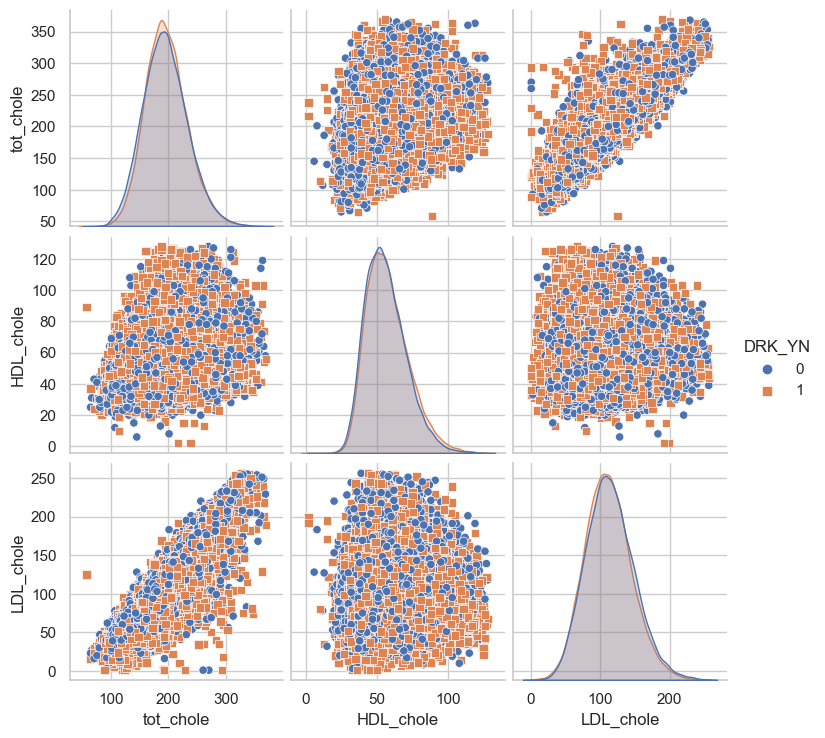

In [39]:
data_changed = {
    'tot_chole': data["tot_chole"], 'HDL_chole': data["HDL_chole"], 'LDL_chole': data["LDL_chole"], current_y_is_smoking_or_drinking: data[current_y_is_smoking_or_drinking],
}

data_changed = pd.DataFrame(data_changed)

random_sample_data = data_changed.sample(n=100000, replace=True)

pairplot(random_sample_data)

#### Pair Plots between triglyceride, hemoglobin, urine_protein and serum_creatinine

        triglyceride  hemoglobin  urine_protein  serum_creatinine  DRK_YN
845964          76.0        12.2            1.0               0.9       0
314819         278.0        12.8            1.0               0.5       0
742150         128.0        14.6            1.0               1.1       0
941461         106.0        14.7            2.0               0.9       1
370366         126.0        16.7            1.0               1.0       1


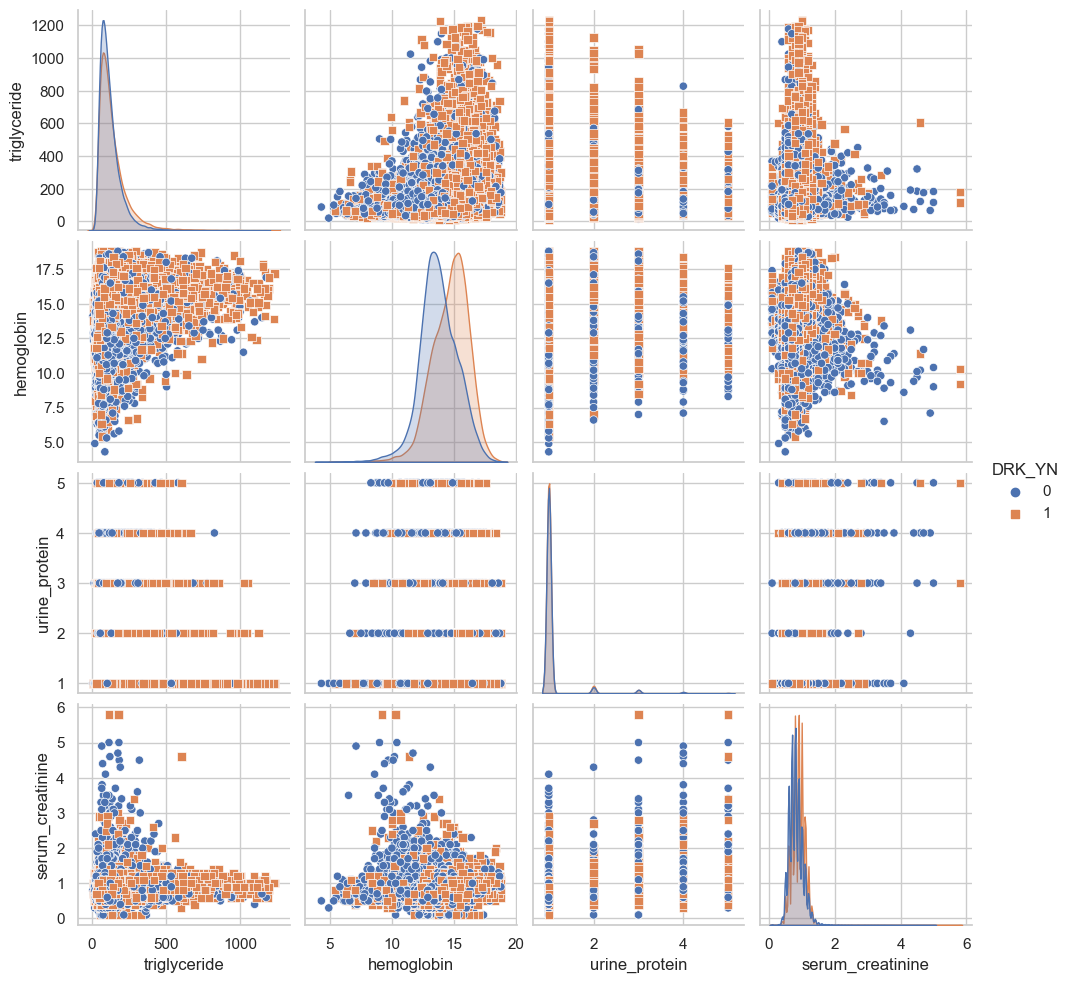

In [40]:
data_changed = {
    'triglyceride': data["triglyceride"], 'hemoglobin': data["hemoglobin"], 'urine_protein': data["urine_protein"], 'serum_creatinine': data["serum_creatinine"], current_y_is_smoking_or_drinking: data[current_y_is_smoking_or_drinking],
}

data_changed = pd.DataFrame(data_changed)

random_sample_data = data_changed.sample(n=100000, replace=True)

pairplot(random_sample_data)

#### Pair Plots betwween 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP'

        SGOT_AST  SGOT_ALT  gamma_GTP  DRK_YN
83146       24.0      21.0       31.0       1
759960      34.0      36.0       73.0       1
800004      21.0      30.0       50.0       0
431584      17.0      13.0       18.0       1
41363       39.0      24.0      191.0       1


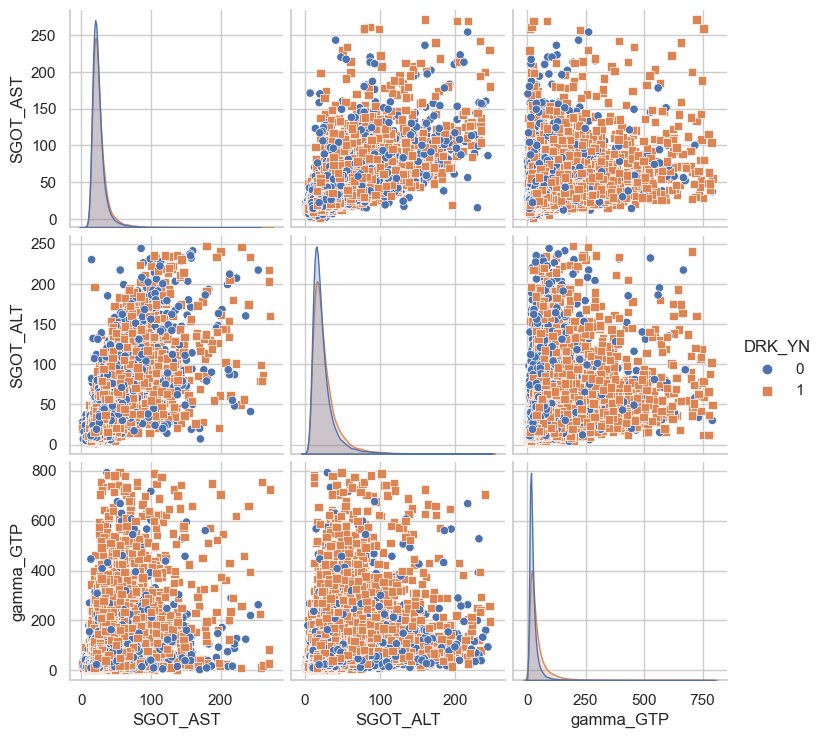

In [41]:
data_changed = {
    'SGOT_AST': data["SGOT_AST"], 'SGOT_ALT': data["SGOT_ALT"], 'gamma_GTP': data["gamma_GTP"], current_y_is_smoking_or_drinking: data[current_y_is_smoking_or_drinking],
}

data_changed = pd.DataFrame(data_changed)

random_sample_data = data_changed.sample(n=100000, replace=True)

pairplot(random_sample_data)

### Dimensionality Reduction

In [42]:
data.columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')

In [43]:
from sklearn.decomposition import PCA
def workinginpca(data):
    pca = PCA(n_components=1)

    pca_result = pca.fit_transform(data)

    # Calculate the explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_

    # Display the result
    print(f"Explained Variance Ratio: {explained_variance_ratio[0]:.2f}")

    # Check how much data is lost
    data_loss = 1 - explained_variance_ratio[0]
    print(f"Data Lost: {data_loss:.2%}")

In [44]:
from sklearn.decomposition import TruncatedSVD
def workinginsvd(data):
    svd = TruncatedSVD(n_components=1)

    transformed_data =  svd.fit_transform(data)

    # Calculate the explained variance ratio
    explained_variance_ratio = svd.explained_variance_ratio_

    print(f"Explained Variance Ratio: {explained_variance_ratio[0]:.2%}")

    # Check how much data is lost
    data_lost = 1 - explained_variance_ratio[0]
    print(f"Data Lost: {data_lost:.2%}")

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
def workinginlda(data , target):
    lda = LinearDiscriminantAnalysis(n_components=1)
    X_lda = lda.fit_transform(data, target)

    # Calculate the explained variance ratio
    explained_variance_ratio = lda.explained_variance_ratio_

    # Calculate the proportion of data retained
    data_retained = np.sum(explained_variance_ratio)

    print(f"Explained Variance Ratio: {explained_variance_ratio[0]:.2f}")

    # Check how much data is lost
    data_lost = 1 - explained_variance_ratio[0]

    print(f"Proportion of Data Retained: {data_retained:.2%}")
    print(f"Proportion of Data lost: {data_lost:.2%}")

#### Working in 'height', 'weight', 'waistline'

In [46]:
workinginpca(data[['height', 'weight', 'waistline']])

Explained Variance Ratio: 0.78
Data Lost: 22.03%


In [47]:
workinginsvd(data[['height', 'weight', 'waistline']])

Explained Variance Ratio: 55.60%
Data Lost: 44.40%


In [48]:
workinginlda(data[['height', 'weight', 'waistline']], data[current_y_is_smoking_or_drinking])

Explained Variance Ratio: 1.00
Proportion of Data Retained: 100.00%
Proportion of Data lost: 0.00%


In [49]:
lda = LinearDiscriminantAnalysis(n_components=1)

data['LDA_combined_h_w_wa'] = lda.fit_transform(data[['height', 'weight', 'waistline']], data[current_y_is_smoking_or_drinking])

data.head(2)

sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0    1   35     170      75       90.0         1.0          1.0        1.0   
1    1   30     180      80       89.0         0.9          1.2        1.0   

   hear_right    SBP  ...  triglyceride  hemoglobin  urine_protein  \
0         1.0  120.0  ...          92.0        17.1            1.0   
1         1.0  130.0  ...         121.0        15.8            1.0   

   serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  \
0               1.0      21.0      35.0       40.0               1.0       1   
1               0.9      20.0      36.0       27.0               3.0       0   

   LDA_combined_h_w_wa  
0             0.887757  
1             2.041414  

[2 rows x 25 columns]

In [50]:
data.drop(['height', 'weight', 'waistline'], axis=1, inplace=True)
data.head(2)

sex  age  sight_left  sight_right  hear_left  hear_right    SBP   DBP  \
0    1   35         1.0          1.0        1.0         1.0  120.0  80.0   
1    1   30         0.9          1.2        1.0         1.0  130.0  82.0   

    BLDS  tot_chole  ...  triglyceride  hemoglobin  urine_protein  \
0   99.0      193.0  ...          92.0        17.1            1.0   
1  106.0      228.0  ...         121.0        15.8            1.0   

   serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  \
0               1.0      21.0      35.0       40.0               1.0       1   
1               0.9      20.0      36.0       27.0               3.0       0   

   LDA_combined_h_w_wa  
0             0.887757  
1             2.041414  

[2 rows x 22 columns]

#### working 'sight_left', 'sight_right'

In [51]:
workinginpca(data[['sight_left', 'sight_right']])

Explained Variance Ratio: 0.65
Data Lost: 34.62%


In [52]:
workinginsvd(data[['sight_left', 'sight_right']])

Explained Variance Ratio: 65.38%
Data Lost: 34.62%


In [53]:
workinginlda(data[['sight_left', 'sight_right']], data[current_y_is_smoking_or_drinking])

Explained Variance Ratio: 1.00
Proportion of Data Retained: 100.00%
Proportion of Data lost: 0.00%


In [54]:
lda = LinearDiscriminantAnalysis(n_components=1)

data['LDA_combined_sight_l_r'] = lda.fit_transform(data[['sight_left', 'sight_right']], data[current_y_is_smoking_or_drinking])

data.head(2)

sex  age  sight_left  sight_right  hear_left  hear_right    SBP   DBP  \
0    1   35         1.0          1.0        1.0         1.0  120.0  80.0   
1    1   30         0.9          1.2        1.0         1.0  130.0  82.0   

    BLDS  tot_chole  ...  hemoglobin  urine_protein  serum_creatinine  \
0   99.0      193.0  ...        17.1            1.0               1.0   
1  106.0      228.0  ...        15.8            1.0               0.9   

   SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  \
0      21.0      35.0       40.0               1.0       1   
1      20.0      36.0       27.0               3.0       0   

   LDA_combined_h_w_wa  LDA_combined_sight_l_r  
0             0.887757                0.041738  
1             2.041414                0.135935  

[2 rows x 23 columns]

In [55]:
data.drop(['sight_left', 'sight_right'], axis=1, inplace=True)
data.head(2)

sex  age  hear_left  hear_right    SBP   DBP   BLDS  tot_chole  HDL_chole  \
0    1   35        1.0         1.0  120.0  80.0   99.0      193.0       48.0   
1    1   30        1.0         1.0  130.0  82.0  106.0      228.0       55.0   

   LDL_chole  ...  hemoglobin  urine_protein  serum_creatinine  SGOT_AST  \
0      126.0  ...        17.1            1.0               1.0      21.0   
1      148.0  ...        15.8            1.0               0.9      20.0   

   SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  LDA_combined_h_w_wa  \
0      35.0       40.0               1.0       1             0.887757   
1      36.0       27.0               3.0       0             2.041414   

   LDA_combined_sight_l_r  
0                0.041738  
1                0.135935  

[2 rows x 21 columns]

#### working 'hear_left', 'hear_right'

In [56]:
workinginpca(data[['hear_left', 'hear_right']])

Explained Variance Ratio: 0.77
Data Lost: 23.16%


In [57]:
workinginsvd(data[['hear_left', 'hear_right']])

Explained Variance Ratio: 76.83%
Data Lost: 23.17%


In [58]:
workinginlda(data[['hear_left', 'hear_right']], data[current_y_is_smoking_or_drinking])

Explained Variance Ratio: 1.00
Proportion of Data Retained: 100.00%
Proportion of Data lost: 0.00%


In [59]:
lda = LinearDiscriminantAnalysis(n_components=1)

data['LDA_combined_sight_h_l_r'] = lda.fit_transform(data[['hear_left', 'hear_right']], data[current_y_is_smoking_or_drinking])

data.head(2)

sex  age  hear_left  hear_right    SBP   DBP   BLDS  tot_chole  HDL_chole  \
0    1   35        1.0         1.0  120.0  80.0   99.0      193.0       48.0   
1    1   30        1.0         1.0  130.0  82.0  106.0      228.0       55.0   

   LDL_chole  ...  urine_protein  serum_creatinine  SGOT_AST  SGOT_ALT  \
0      126.0  ...            1.0               1.0      21.0      35.0   
1      148.0  ...            1.0               0.9      20.0      36.0   

   gamma_GTP  SMK_stat_type_cd  DRK_YN  LDA_combined_h_w_wa  \
0       40.0               1.0       1             0.887757   
1       27.0               3.0       0             2.041414   

   LDA_combined_sight_l_r  LDA_combined_sight_h_l_r  
0                0.041738                  0.204328  
1                0.135935                  0.204328  

[2 rows x 22 columns]

In [60]:
data.drop(['hear_left', 'hear_right'], axis=1, inplace=True)
data.head(2)

sex  age    SBP   DBP   BLDS  tot_chole  HDL_chole  LDL_chole  \
0    1   35  120.0  80.0   99.0      193.0       48.0      126.0   
1    1   30  130.0  82.0  106.0      228.0       55.0      148.0   

   triglyceride  hemoglobin  urine_protein  serum_creatinine  SGOT_AST  \
0          92.0        17.1            1.0               1.0      21.0   
1         121.0        15.8            1.0               0.9      20.0   

   SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  LDA_combined_h_w_wa  \
0      35.0       40.0               1.0       1             0.887757   
1      36.0       27.0               3.0       0             2.041414   

   LDA_combined_sight_l_r  LDA_combined_sight_h_l_r  
0                0.041738                  0.204328  
1                0.135935                  0.204328

#### working in SBP AND BLDS


In [61]:
workinginpca(data[['SBP', 'BLDS']])

Explained Variance Ratio: 0.73
Data Lost: 26.76%


In [62]:
workinginsvd(data[['SBP', 'BLDS']])

Explained Variance Ratio: 54.40%
Data Lost: 45.60%


In [63]:
workinginlda(data[['SBP', 'BLDS']], data[current_y_is_smoking_or_drinking])

Explained Variance Ratio: 1.00
Proportion of Data Retained: 100.00%
Proportion of Data lost: 0.00%


In [64]:
lda = LinearDiscriminantAnalysis(n_components=1)

data['LDA_combined_sbp_blds'] = lda.fit_transform(data[['SBP', 'BLDS']], data[current_y_is_smoking_or_drinking])

data.head(2)

sex  age    SBP   DBP   BLDS  tot_chole  HDL_chole  LDL_chole  \
0    1   35  120.0  80.0   99.0      193.0       48.0      126.0   
1    1   30  130.0  82.0  106.0      228.0       55.0      148.0   

   triglyceride  hemoglobin  ...  serum_creatinine  SGOT_AST  SGOT_ALT  \
0          92.0        17.1  ...               1.0      21.0      35.0   
1         121.0        15.8  ...               0.9      20.0      36.0   

   gamma_GTP  SMK_stat_type_cd  DRK_YN  LDA_combined_h_w_wa  \
0       40.0               1.0       1             0.887757   
1       27.0               3.0       0             2.041414   

   LDA_combined_sight_l_r  LDA_combined_sight_h_l_r  LDA_combined_sbp_blds  
0                0.041738                  0.204328              -0.162615  
1                0.135935                  0.204328               0.555347  

[2 rows x 21 columns]

In [65]:
data.drop(['SBP', 'BLDS'], axis=1, inplace=True)
data.head(2)

sex  age   DBP  tot_chole  HDL_chole  LDL_chole  triglyceride  hemoglobin  \
0    1   35  80.0      193.0       48.0      126.0          92.0        17.1   
1    1   30  82.0      228.0       55.0      148.0         121.0        15.8   

   urine_protein  serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  \
0            1.0               1.0      21.0      35.0       40.0   
1            1.0               0.9      20.0      36.0       27.0   

   SMK_stat_type_cd  DRK_YN  LDA_combined_h_w_wa  LDA_combined_sight_l_r  \
0               1.0       1             0.887757                0.041738   
1               3.0       0             2.041414                0.135935   

   LDA_combined_sight_h_l_r  LDA_combined_sbp_blds  
0                  0.204328              -0.162615  
1                  0.204328               0.555347

#### working in tot_chole, LDL_chole

In [66]:
workinginpca(data[['tot_chole', 'LDL_chole']])

Explained Variance Ratio: 0.95
Data Lost: 5.13%


In [67]:
workinginsvd(data[['tot_chole', 'LDL_chole']])

Explained Variance Ratio: 91.35%
Data Lost: 8.65%


In [68]:
workinginlda(data[['tot_chole', 'LDL_chole']], data[current_y_is_smoking_or_drinking])

Explained Variance Ratio: 1.00
Proportion of Data Retained: 100.00%
Proportion of Data lost: 0.00%


In [69]:
lda = LinearDiscriminantAnalysis(n_components=1)

data['LDA_combined_tot_chole_LDL_chole'] = lda.fit_transform(data[['tot_chole', 'LDL_chole']], data[current_y_is_smoking_or_drinking])

data.head(2)

sex  age   DBP  tot_chole  HDL_chole  LDL_chole  triglyceride  hemoglobin  \
0    1   35  80.0      193.0       48.0      126.0          92.0        17.1   
1    1   30  82.0      228.0       55.0      148.0         121.0        15.8   

   urine_protein  serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  \
0            1.0               1.0      21.0      35.0       40.0   
1            1.0               0.9      20.0      36.0       27.0   

   SMK_stat_type_cd  DRK_YN  LDA_combined_h_w_wa  LDA_combined_sight_l_r  \
0               1.0       1             0.887757                0.041738   
1               3.0       0             2.041414                0.135935   

   LDA_combined_sight_h_l_r  LDA_combined_sbp_blds  \
0                  0.204328              -0.162615   
1                  0.204328               0.555347   

   LDA_combined_tot_chole_LDL_chole  
0                         -0.997191  
1                         -0.442149

In [70]:
data.drop(['tot_chole', 'LDL_chole'], axis=1, inplace=True)
data.head(2)

sex  age   DBP  HDL_chole  triglyceride  hemoglobin  urine_protein  \
0    1   35  80.0       48.0          92.0        17.1            1.0   
1    1   30  82.0       55.0         121.0        15.8            1.0   

   serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  \
0               1.0      21.0      35.0       40.0               1.0       1   
1               0.9      20.0      36.0       27.0               3.0       0   

   LDA_combined_h_w_wa  LDA_combined_sight_l_r  LDA_combined_sight_h_l_r  \
0             0.887757                0.041738                  0.204328   
1             2.041414                0.135935                  0.204328   

   LDA_combined_sbp_blds  LDA_combined_tot_chole_LDL_chole  
0              -0.162615                         -0.997191  
1               0.555347                         -0.442149

#### working in SGOT_AST and SGOT_ALT

In [71]:
workinginpca(data[['SGOT_AST', 'SGOT_ALT']])

Explained Variance Ratio: 0.89
Data Lost: 10.87%


In [72]:
workinginsvd(data[['SGOT_AST', 'SGOT_ALT']])

Explained Variance Ratio: 86.34%
Data Lost: 13.66%


In [73]:
workinginlda(data[['SGOT_AST', 'SGOT_ALT']], data[current_y_is_smoking_or_drinking])

Explained Variance Ratio: 1.00
Proportion of Data Retained: 100.00%
Proportion of Data lost: 0.00%


In [74]:
lda = LinearDiscriminantAnalysis(n_components=1)

data['LDA_combined_SGOT_AST_SGOT_ALT'] = lda.fit_transform(data[['SGOT_AST', 'SGOT_ALT']], data[current_y_is_smoking_or_drinking])

data.head(2)

sex  age   DBP  HDL_chole  triglyceride  hemoglobin  urine_protein  \
0    1   35  80.0       48.0          92.0        17.1            1.0   
1    1   30  82.0       55.0         121.0        15.8            1.0   

   serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  \
0               1.0      21.0      35.0       40.0               1.0       1   
1               0.9      20.0      36.0       27.0               3.0       0   

   LDA_combined_h_w_wa  LDA_combined_sight_l_r  LDA_combined_sight_h_l_r  \
0             0.887757                0.041738                  0.204328   
1             2.041414                0.135935                  0.204328   

   LDA_combined_sbp_blds  LDA_combined_tot_chole_LDL_chole  \
0              -0.162615                         -0.997191   
1               0.555347                         -0.442149   

   LDA_combined_SGOT_AST_SGOT_ALT  
0                        0.534921  
1                        0.590776

In [75]:
data.drop(['SGOT_AST', 'SGOT_ALT'], axis=1, inplace=True)
data.head(2)

sex  age   DBP  HDL_chole  triglyceride  hemoglobin  urine_protein  \
0    1   35  80.0       48.0          92.0        17.1            1.0   
1    1   30  82.0       55.0         121.0        15.8            1.0   

   serum_creatinine  gamma_GTP  SMK_stat_type_cd  DRK_YN  LDA_combined_h_w_wa  \
0               1.0       40.0               1.0       1             0.887757   
1               0.9       27.0               3.0       0             2.041414   

   LDA_combined_sight_l_r  LDA_combined_sight_h_l_r  LDA_combined_sbp_blds  \
0                0.041738                  0.204328              -0.162615   
1                0.135935                  0.204328               0.555347   

   LDA_combined_tot_chole_LDL_chole  LDA_combined_SGOT_AST_SGOT_ALT  
0                         -0.997191                        0.534921  
1                         -0.442149                        0.590776

### REGRESSION MODELS 

In [76]:
data.columns

Index(['sex', 'age', 'DBP', 'HDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'gamma_GTP', 'SMK_stat_type_cd',
       'DRK_YN', 'LDA_combined_h_w_wa', 'LDA_combined_sight_l_r',
       'LDA_combined_sight_h_l_r', 'LDA_combined_sbp_blds',
       'LDA_combined_tot_chole_LDL_chole', 'LDA_combined_SGOT_AST_SGOT_ALT'],
      dtype='object')

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [78]:
X = data[['sex', 'age', 'DBP', 'HDL_chole', 'triglyceride', 'hemoglobin',
          'urine_protein', 'serum_creatinine', 'LDA_combined_SGOT_AST_SGOT_ALT', 'gamma_GTP', 'LDA_combined_h_w_wa',
          'LDA_combined_sight_l_r', 'LDA_combined_sight_h_l_r',
          'LDA_combined_sbp_blds', 'LDA_combined_tot_chole_LDL_chole']]


y = data[current_y_is_smoking_or_drinking]


X_train, X_test, y_train, y_test = train_test_split(

    X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


# Logistic Regression

logreg_model = LogisticRegression(random_state=42)

logreg_model.fit(X_train, y_train)

logreg_predictions = logreg_model.predict(X_test)



print("Logistic Regression:")

print("Accuracy:", accuracy_score(y_test, logreg_predictions))

print("Classification Report:\n",

      classification_report(y_test, logreg_predictions))
print("confusion_matrix:\n", confusion_matrix(y_test, logreg_predictions))

Logistic Regression:
Accuracy: 0.7215310713233876
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72     98607
           1       0.72      0.72      0.72     98327

    accuracy                           0.72    196934
   macro avg       0.72      0.72      0.72    196934
weighted avg       0.72      0.72      0.72    196934

confusion_matrix:
 [[71460 27147]
 [27693 70634]]


In [79]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)

print("\nNaive Bayes:")
print("Accuracy:", accuracy_score(y_test, nb_predictions))
print("Classification Report:\n", classification_report(y_test, nb_predictions))
print("confusion_matrix:\n", confusion_matrix(y_test, nb_predictions))


Naive Bayes:
Accuracy: 0.6900890653721551
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.72      0.70     98607
           1       0.70      0.66      0.68     98327

    accuracy                           0.69    196934
   macro avg       0.69      0.69      0.69    196934
weighted avg       0.69      0.69      0.69    196934

confusion_matrix:
 [[71374 27233]
 [33799 64528]]


### Tensorflow models

In [107]:
# Import necessary libraries
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# activation = 'relu'
activation = 'sigmoid'
# Build a simple neural network model
model = tf.keras.Sequential([
    # First hidden layer with 20 neurons and ReLU activation
    tf.keras.layers.Dense(40, activation=activation, input_shape=(15,)),
    # Second hidden layer with 20 neurons and ReLU activation
    tf.keras.layers.Dense(30, activation=activation),
    # Third hidden layer with 20 neurons and ReLU activation
    tf.keras.layers.Dense(15, activation=activation),
    # Third hidden layer with 20 neurons and ReLU activation
    tf.keras.layers.Dense(7, activation=activation),
    # Output layer with 3 neurons and softmax activation
    tf.keras.layers.Dense(3, activation=activation)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32,
          validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/5
24617/24617 [==============================] - 59s 2ms/step - loss: 0.5463 - accuracy: 0.7200 - val_loss: 0.5318 - val_accuracy: 0.7274
Epoch 2/5
24617/24617 [==============================] - 54s 2ms/step - loss: 0.5326 - accuracy: 0.7272 - val_loss: 0.5292 - val_accuracy: 0.7296
Epoch 3/5
24617/24617 [==============================] - 55s 2ms/step - loss: 0.5312 - accuracy: 0.7285 - val_loss: 0.5323 - val_accuracy: 0.7274
Epoch 4/5
24617/24617 [==============================] - 56s 2ms/step - loss: 0.5305 - accuracy: 0.7290 - val_loss: 0.5304 - val_accuracy: 0.7289
Epoch 5/5
6155/6155 [==============================] - 10s 2ms/step - loss: 0.5297 - accuracy: 0.7281
Test Accuracy: 0.7280916571617126


In [115]:
y_predicted_labels = model.predict(X_test)
print(y_predicted_labels[0:2])

predicted_labels = np.argmax(y_predicted_labels, axis=1)

print(predicted_labels[0:8])

6155/6155 [==============================] - 9s 2ms/step
[[8.3805776e-01 8.4415770e-01 1.7019141e-11]
 [9.0691513e-01 8.3019245e-01 1.0916148e-11]]
[1 0 0 1 1 1 0 1]


In [116]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=predicted_labels)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[74683, 23924],
       [29624, 68703]])>

In [117]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32,
          validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/10
24617/24617 [==============================] - 62s 3ms/step - loss: 0.5298 - accuracy: 0.7300 - val_loss: 0.5278 - val_accuracy: 0.7316
Epoch 2/10
24617/24617 [==============================] - 59s 2ms/step - loss: 0.5295 - accuracy: 0.7300 - val_loss: 0.5302 - val_accuracy: 0.7287
Epoch 3/10
24617/24617 [==============================] - 63s 3ms/step - loss: 0.5294 - accuracy: 0.7300 - val_loss: 0.5280 - val_accuracy: 0.7311
Epoch 4/10
24617/24617 [==============================] - 62s 3ms/step - loss: 0.5293 - accuracy: 0.7301 - val_loss: 0.5284 - val_accuracy: 0.7310
Epoch 5/10
24617/24617 [==============================] - 63s 3ms/step - loss: 0.5291 - accuracy: 0.7299 - val_loss: 0.5278 - val_accuracy: 0.7312
Epoch 6/10
24617/24617 [==============================] - 56s 2ms/step - loss: 0.5290 - accuracy: 0.7303 - val_loss: 0.5289 - val_accuracy: 0.7311
Epoch 7/10
24617/24617 [==============================] - 54s 2ms/step - loss: 0.5289 - accuracy: 0.7303 - val_loss: 0

In [118]:
y_predicted_labels = model.predict(X_test)
print(y_predicted_labels[0:2])

predicted_labels = np.argmax(y_predicted_labels, axis=1)

print(predicted_labels[0:8])

cm = tf.math.confusion_matrix(labels=y_test,predictions=predicted_labels)
print(cm)

6155/6155 [==============================] - 10s 2ms/step
[[8.1501472e-01 8.2515943e-01 6.7729247e-12]
 [8.8624460e-01 8.1725860e-01 2.7876037e-12]]
[1 0 0 1 1 1 0 1]
tf.Tensor(
[[71603 27004]
 [25840 72487]], shape=(2, 2), dtype=int32)


In [119]:
# Import necessary libraries
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

activation = 'sigmoid'
# Build a simple neural network model
model = tf.keras.Sequential([
    # First hidden layer with 40 neurons and sigmoid activation
    tf.keras.layers.Dense(13, activation=activation, input_shape=(15,)),
    # Second hidden layer with 30 neurons and sigmoid activation
    tf.keras.layers.Dense(11, activation=activation),
    # Third hidden layer with 20 neurons and sigmoid activation
    tf.keras.layers.Dense(9, activation=activation),
    # Third hidden layer with 10 neurons and sigmoid activation
    tf.keras.layers.Dense(7, activation=activation),
    # Third hidden layer with 5 neurons and sigmoid activation
    tf.keras.layers.Dense(5, activation=activation),
    # Output layer with 3 neurons and sigmoid activation
    tf.keras.layers.Dense(3, activation=activation)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32,
          validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/5
24617/24617 [==============================] - 59s 2ms/step - loss: 0.5590 - accuracy: 0.7158 - val_loss: 0.5326 - val_accuracy: 0.7272
Epoch 2/5
24617/24617 [==============================] - 57s 2ms/step - loss: 0.5328 - accuracy: 0.7270 - val_loss: 0.5307 - val_accuracy: 0.7289
Epoch 3/5
24617/24617 [==============================] - 54s 2ms/step - loss: 0.5314 - accuracy: 0.7284 - val_loss: 0.5309 - val_accuracy: 0.7287
Epoch 4/5
24617/24617 [==============================] - 57s 2ms/step - loss: 0.5308 - accuracy: 0.7288 - val_loss: 0.5322 - val_accuracy: 0.7283
Epoch 5/5
6155/6155 [==============================] - 10s 2ms/step - loss: 0.5283 - accuracy: 0.7310
Test Accuracy: 0.7309504747390747


In [120]:
y_predicted_labels = model.predict(X_test)
print(y_predicted_labels[0:2])

predicted_labels = np.argmax(y_predicted_labels, axis=1)

print(predicted_labels[0:8])

cm = tf.math.confusion_matrix(labels=y_test,predictions=predicted_labels)
print(cm)

6155/6155 [==============================] - 11s 2ms/step
[[8.6160833e-01 8.8858825e-01 3.2688614e-09]
 [9.1055900e-01 8.3178300e-01 3.3608620e-09]]
[1 0 0 1 1 1 0 1]
tf.Tensor(
[[71512 27095]
 [25890 72437]], shape=(2, 2), dtype=int32)


In [122]:
# Import necessary libraries
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

activation = 'sigmoid'
# Build a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation=activation, input_shape=(15,)),
    tf.keras.layers.Dense(13, activation=activation),
    tf.keras.layers.Dense(11, activation=activation),
    tf.keras.layers.Dense(9, activation=activation),
    tf.keras.layers.Dense(7, activation=activation),
    tf.keras.layers.Dense(5, activation=activation),
    tf.keras.layers.Dense(3, activation=activation)
])

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32,
          validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/10
24617/24617 [==============================] - 57s 2ms/step - loss: 0.5600 - accuracy: 0.7097 - val_loss: 0.5338 - val_accuracy: 0.7253
Epoch 2/10
24617/24617 [==============================] - 51s 2ms/step - loss: 0.5334 - accuracy: 0.7266 - val_loss: 0.5314 - val_accuracy: 0.7279
Epoch 3/10
24617/24617 [==============================] - 54s 2ms/step - loss: 0.5316 - accuracy: 0.7280 - val_loss: 0.5306 - val_accuracy: 0.7285
Epoch 4/10
24617/24617 [==============================] - 55s 2ms/step - loss: 0.5309 - accuracy: 0.7289 - val_loss: 0.5280 - val_accuracy: 0.7306
Epoch 5/10
24617/24617 [==============================] - 53s 2ms/step - loss: 0.5306 - accuracy: 0.7291 - val_loss: 0.5288 - val_accuracy: 0.7305
Epoch 6/10
24617/24617 [==============================] - 55s 2ms/step - loss: 0.5303 - accuracy: 0.7291 - val_loss: 0.5280 - val_accuracy: 0.7313
Epoch 7/10
24617/24617 [==============================] - 52s 2ms/step - loss: 0.5301 - accuracy: 0.7295 - val_loss: 0

In [130]:
# Import necessary libraries
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

activation = 'sigmoid'
# Build a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation=activation, input_shape=(15,)),
    tf.keras.layers.Dense(13, activation=activation),
    tf.keras.layers.Dense(11, activation=activation),
    tf.keras.layers.Dense(9, activation=activation),
    tf.keras.layers.Dense(7, activation=activation),
    tf.keras.layers.Dense(5, activation=activation),
    tf.keras.layers.Dense(3, activation=activation),
    tf.keras.layers.Dense(2, activation=activation),
])

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32,
          validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/5
24617/24617 [==============================] - 64s 3ms/step - loss: 0.5579 - accuracy: 0.7144 - val_loss: 0.5345 - val_accuracy: 0.7261
Epoch 2/5
24617/24617 [==============================] - 63s 3ms/step - loss: 0.5342 - accuracy: 0.7263 - val_loss: 0.5303 - val_accuracy: 0.7295
Epoch 3/5
24617/24617 [==============================] - 58s 2ms/step - loss: 0.5322 - accuracy: 0.7279 - val_loss: 0.5301 - val_accuracy: 0.7285
Epoch 4/5
24617/24617 [==============================] - 81s 3ms/step - loss: 0.5315 - accuracy: 0.7286 - val_loss: 0.5300 - val_accuracy: 0.7297
Epoch 5/5
6155/6155 [==============================] - 12s 2ms/step - loss: 0.5305 - accuracy: 0.7293
Test Accuracy: 0.7292748093605042


In [131]:
# Import necessary libraries
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

activation = 'sigmoid'
# Build a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation='relu', input_shape=(15,)),
    tf.keras.layers.Dense(13, activation='relu'),
    tf.keras.layers.Dense(11, activation='relu'),
    tf.keras.layers.Dense(9, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(2, activation=activation),
])

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32,
          validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/5
24617/24617 [==============================] - 74s 3ms/step - loss: 0.5411 - accuracy: 0.7237 - val_loss: 0.5305 - val_accuracy: 0.7298
Epoch 2/5
24617/24617 [==============================] - 63s 3ms/step - loss: 0.5329 - accuracy: 0.7279 - val_loss: 0.5297 - val_accuracy: 0.7305
Epoch 3/5
24617/24617 [==============================] - 90s 4ms/step - loss: 0.5320 - accuracy: 0.7289 - val_loss: 0.5321 - val_accuracy: 0.7304
Epoch 4/5
24617/24617 [==============================] - 70s 3ms/step - loss: 0.5316 - accuracy: 0.7293 - val_loss: 0.5301 - val_accuracy: 0.7300
Epoch 5/5
6155/6155 [==============================] - 11s 2ms/step - loss: 0.5281 - accuracy: 0.7313
Test Accuracy: 0.7313312888145447


In [132]:
y_predicted_labels = model.predict(X_test)
print(y_predicted_labels[0:2])

predicted_labels = np.argmax(y_predicted_labels, axis=1)

print(predicted_labels[0:8])

cm = tf.math.confusion_matrix(labels=y_test,predictions=predicted_labels)
print(cm)

6155/6155 [==============================] - 9s 1ms/step
[[0.40953684 0.49690732]
 [0.56572646 0.3812425 ]]
[1 0 0 1 1 1 0 1]
tf.Tensor(
[[70867 27740]
 [25170 73157]], shape=(2, 2), dtype=int32)
